## import the library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
import shap

from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from datetime import datetime
from sklearn.calibration import calibration_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from sklearn.model_selection import learning_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import brier_score_loss
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, cohen_kappa_score, brier_score_loss
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

/Users/ka53/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## load to the dataset

In [2]:
df = pd.read_csv('dataset.csv')

In [45]:
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,category_1,category_2,target
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,Above Average,Region C,1
1,-0.138264,-0.061846,NaN,0.403768,0.704674,-2.498565,-1.339227,-1.942298,Below Average,Region A,0
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,High,Region C,1
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,High,Region B,1
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,Below Average,Region C,0
...,...,...,...,...,...,...,...,...,...,...,...
8995,0.101630,0.400250,NaN,-0.019412,-0.063150,0.077627,0.540975,-0.169030,Above Average,Region A,0
8996,1.167218,2.177774,-1.716067,1.994835,0.350043,-0.544915,0.089050,-0.944220,High,Region C,1
8997,1.588447,3.333945,-2.615488,3.476880,-0.933276,2.027658,0.239583,1.951491,High,Region C,1
8998,-0.684987,-1.599835,1.063341,-1.252109,-0.724001,2.228943,0.989794,1.936476,Low,Region B,0


## dataset

In [46]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,category_1,category_2,target
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,Above Average,Region C,1
1,-0.138264,-0.061846,NaN,0.403768,0.704674,-2.498565,-1.339227,-1.942298,Below Average,Region A,0
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,High,Region C,1
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,High,Region B,1
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,Below Average,Region C,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   8600 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   8500 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   category_1  9000 non-null   object 
 9   category_2  9000 non-null   object 
 10  target      9000 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 773.6+ KB


In [48]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target
count,9000.000000,9000.000000,8600.000000,9000.000000,9000.000000,8500.000000,9000.000000,9000.000000,9000.000000
mean,0.000427,0.003349,0.003235,-0.008481,-0.002177,-0.006447,0.000592,0.003348,0.475444
std,1.241318,2.508324,1.542901,2.061784,0.577415,1.981615,1.075064,2.043643,0.499424
min,-18.665400,-37.852816,-6.676680,-8.190124,-0.999791,-8.590782,-4.422265,-9.474989,0.000000
25%,-0.680062,-1.382610,-1.022085,-1.399928,-0.502614,-1.329040,-0.700078,-1.356620,0.000000
50%,-0.003938,-0.016698,0.005196,-0.019541,0.001695,-0.003137,-0.000097,-0.007584,0.000000
75%,0.680513,1.380228,1.038571,1.394151,0.497004,1.324897,0.731942,1.402024,1.000000
max,21.934496,47.603454,6.203055,8.189001,0.999914,6.803751,3.857219,7.572578,1.000000


In [49]:
df.duplicated().sum()

0

In [50]:
df.isnull().sum()

feature_1       0
feature_2       0
feature_3     400
feature_4       0
feature_5       0
feature_6     500
feature_7       0
feature_8       0
category_1      0
category_2      0
target          0
dtype: int64

In [3]:
imputer = SimpleImputer(strategy='median')  
df[['feature_3', 'feature_6']] = imputer.fit_transform(df[['feature_3', 'feature_6']])

In [52]:
df.isnull().sum()

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
category_1    0
category_2    0
target        0
dtype: int64

In [53]:
df['category_1'].value_counts()

category_1
Low              2802
High             2763
Above Average    1727
Below Average    1708
Name: count, dtype: int64

In [54]:
df['category_2'].value_counts()

category_2
Region B    3618
Region A    3551
Region C    1831
Name: count, dtype: int64

## eda

<Axes: >

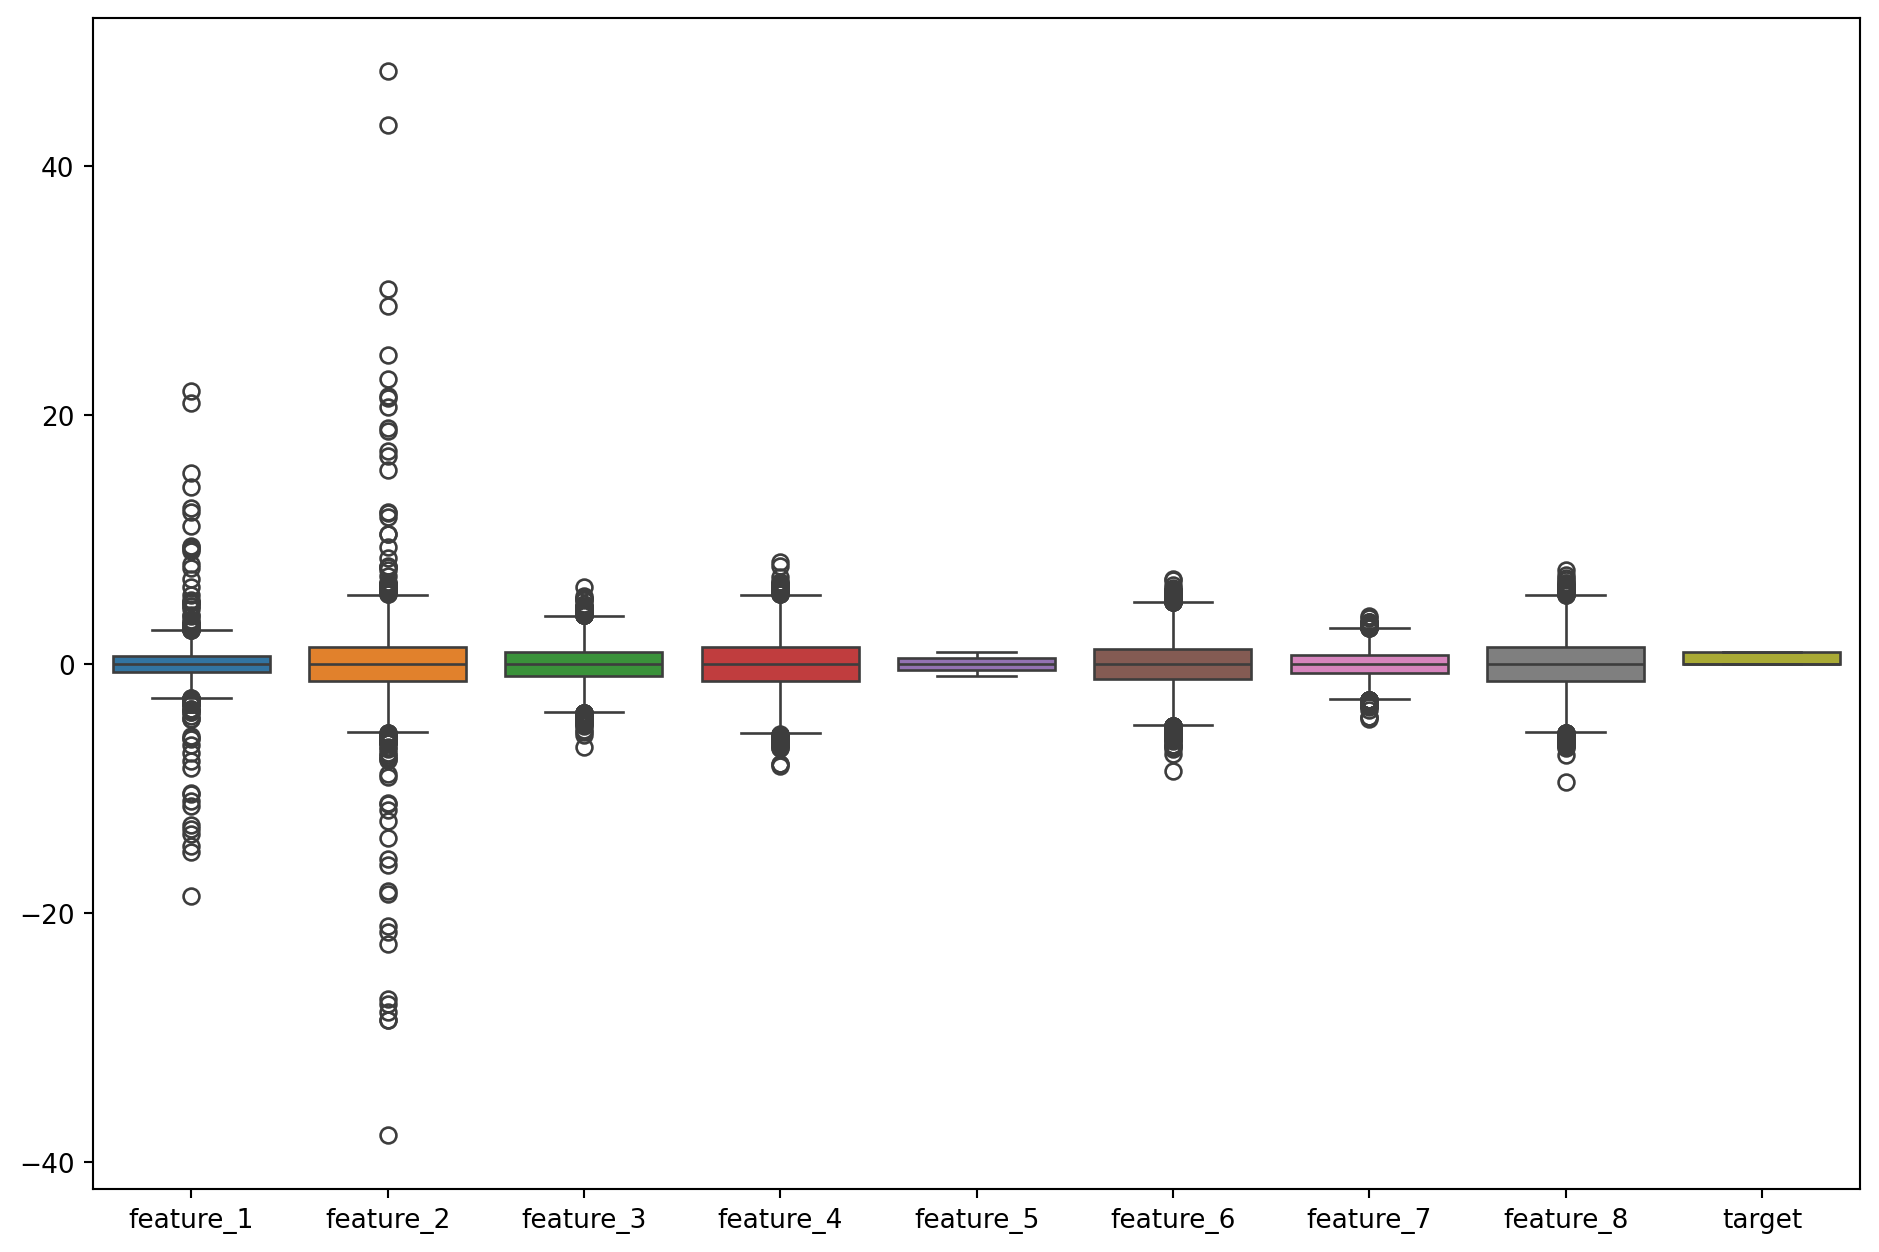

In [55]:
plt.figure(figsize=(12,8), dpi=190)
sb.boxplot(data=df)

<Axes: >

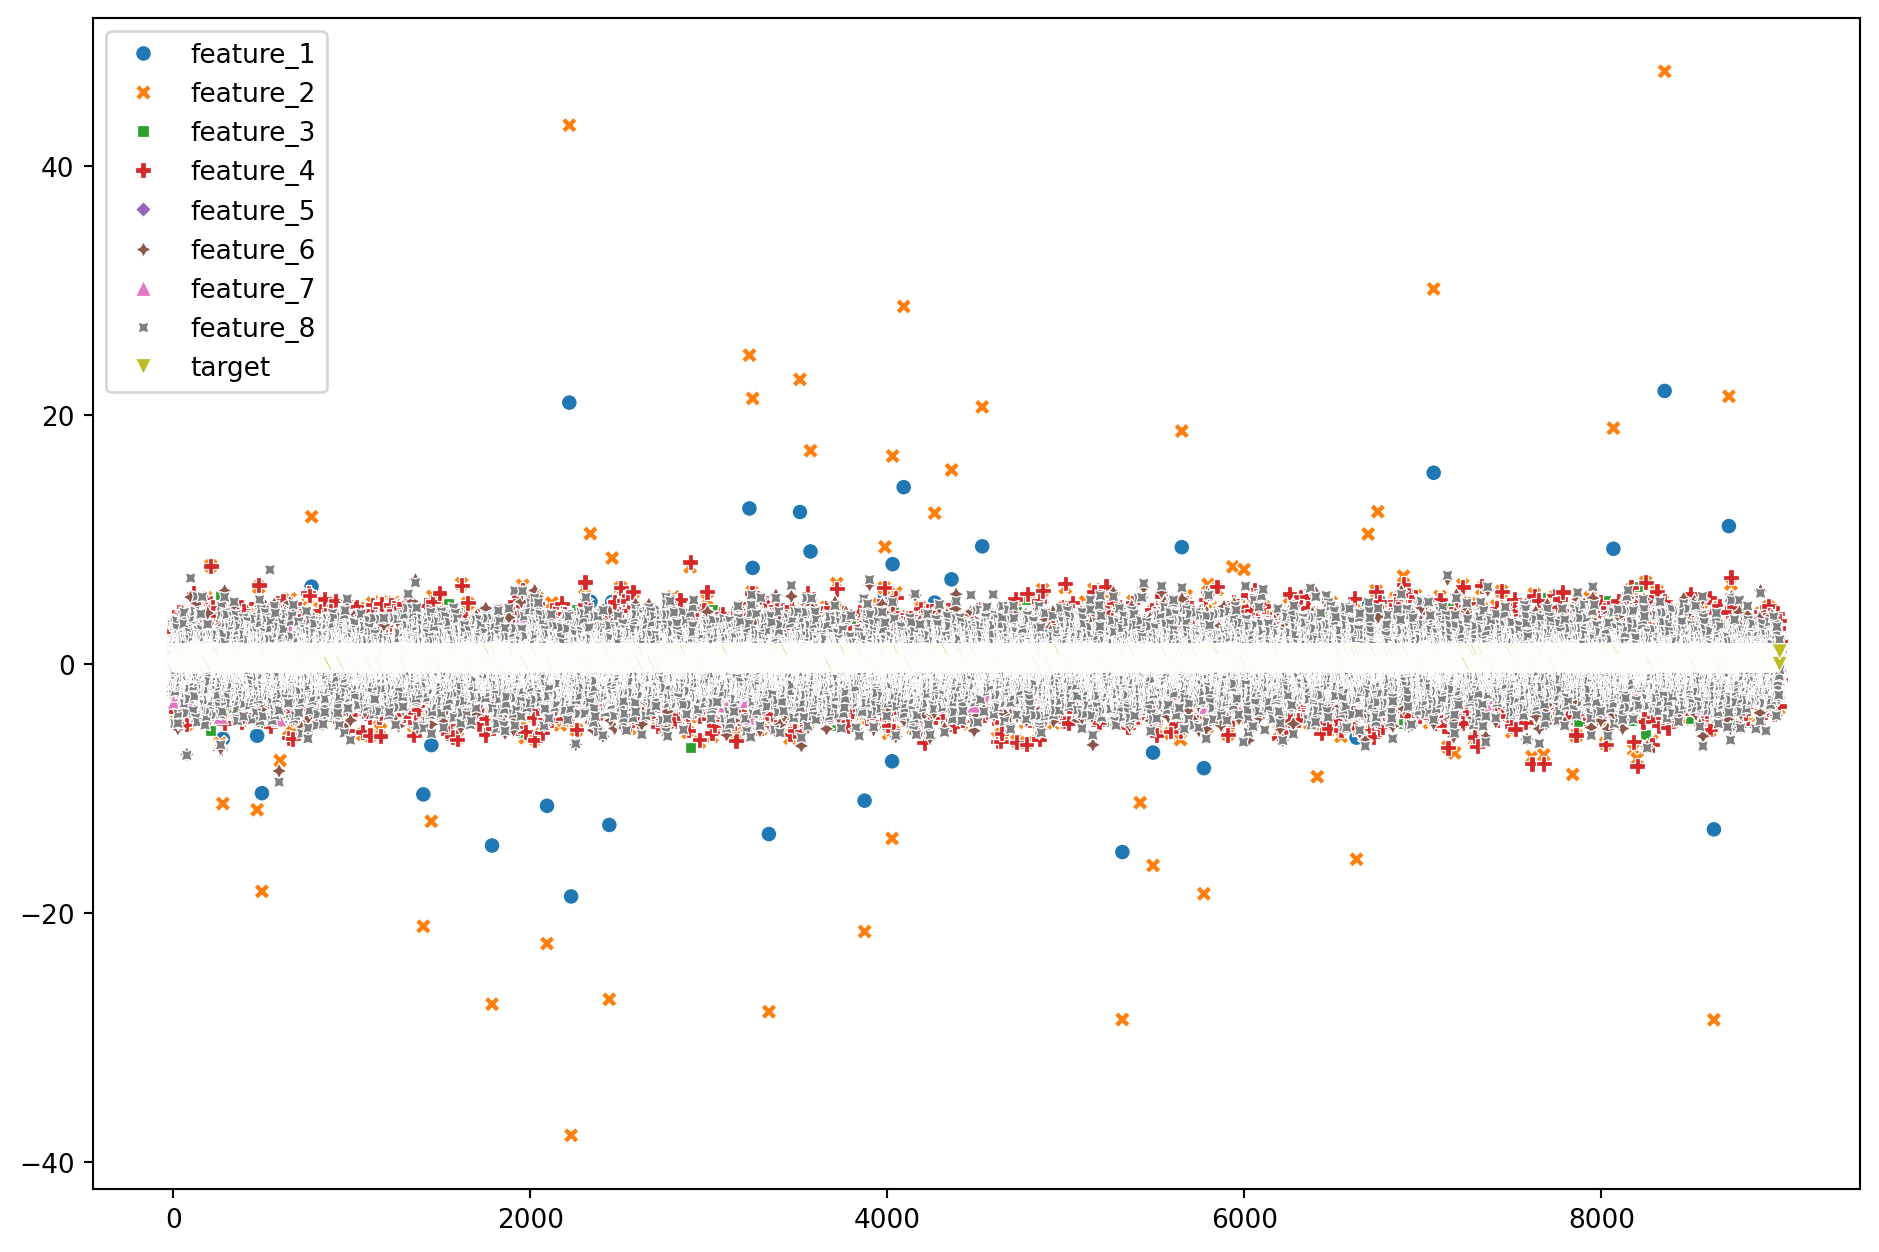

In [56]:
plt.figure(figsize=(12,8), dpi=190)
sb.scatterplot(data=df)

<Axes: xlabel='category_1', ylabel='count'>

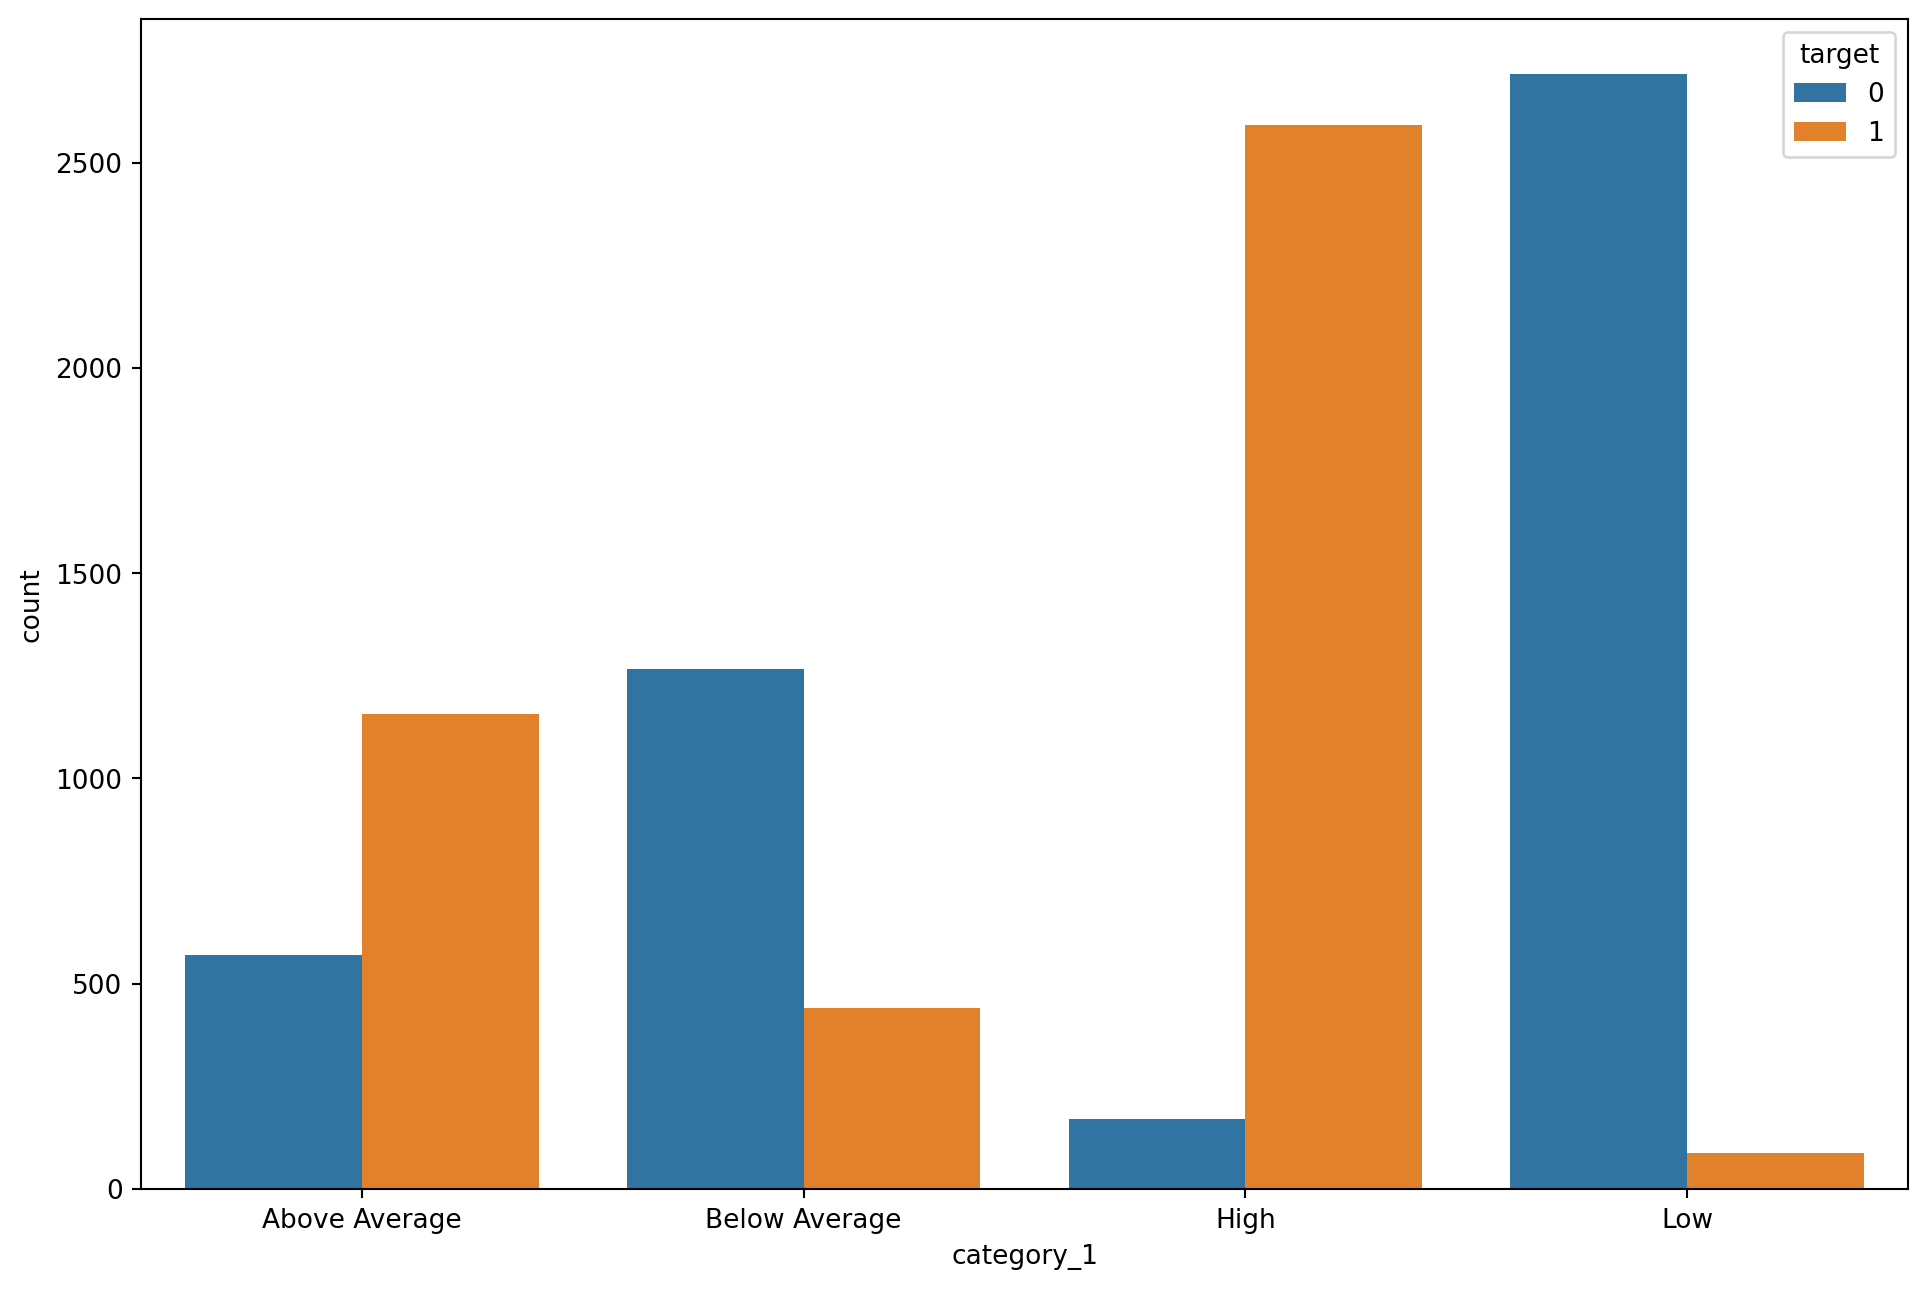

In [57]:
plt.figure(figsize=(12,8), dpi=190)
sb.countplot(data=df,x='category_1', hue='target')

<Axes: xlabel='category_2', ylabel='count'>

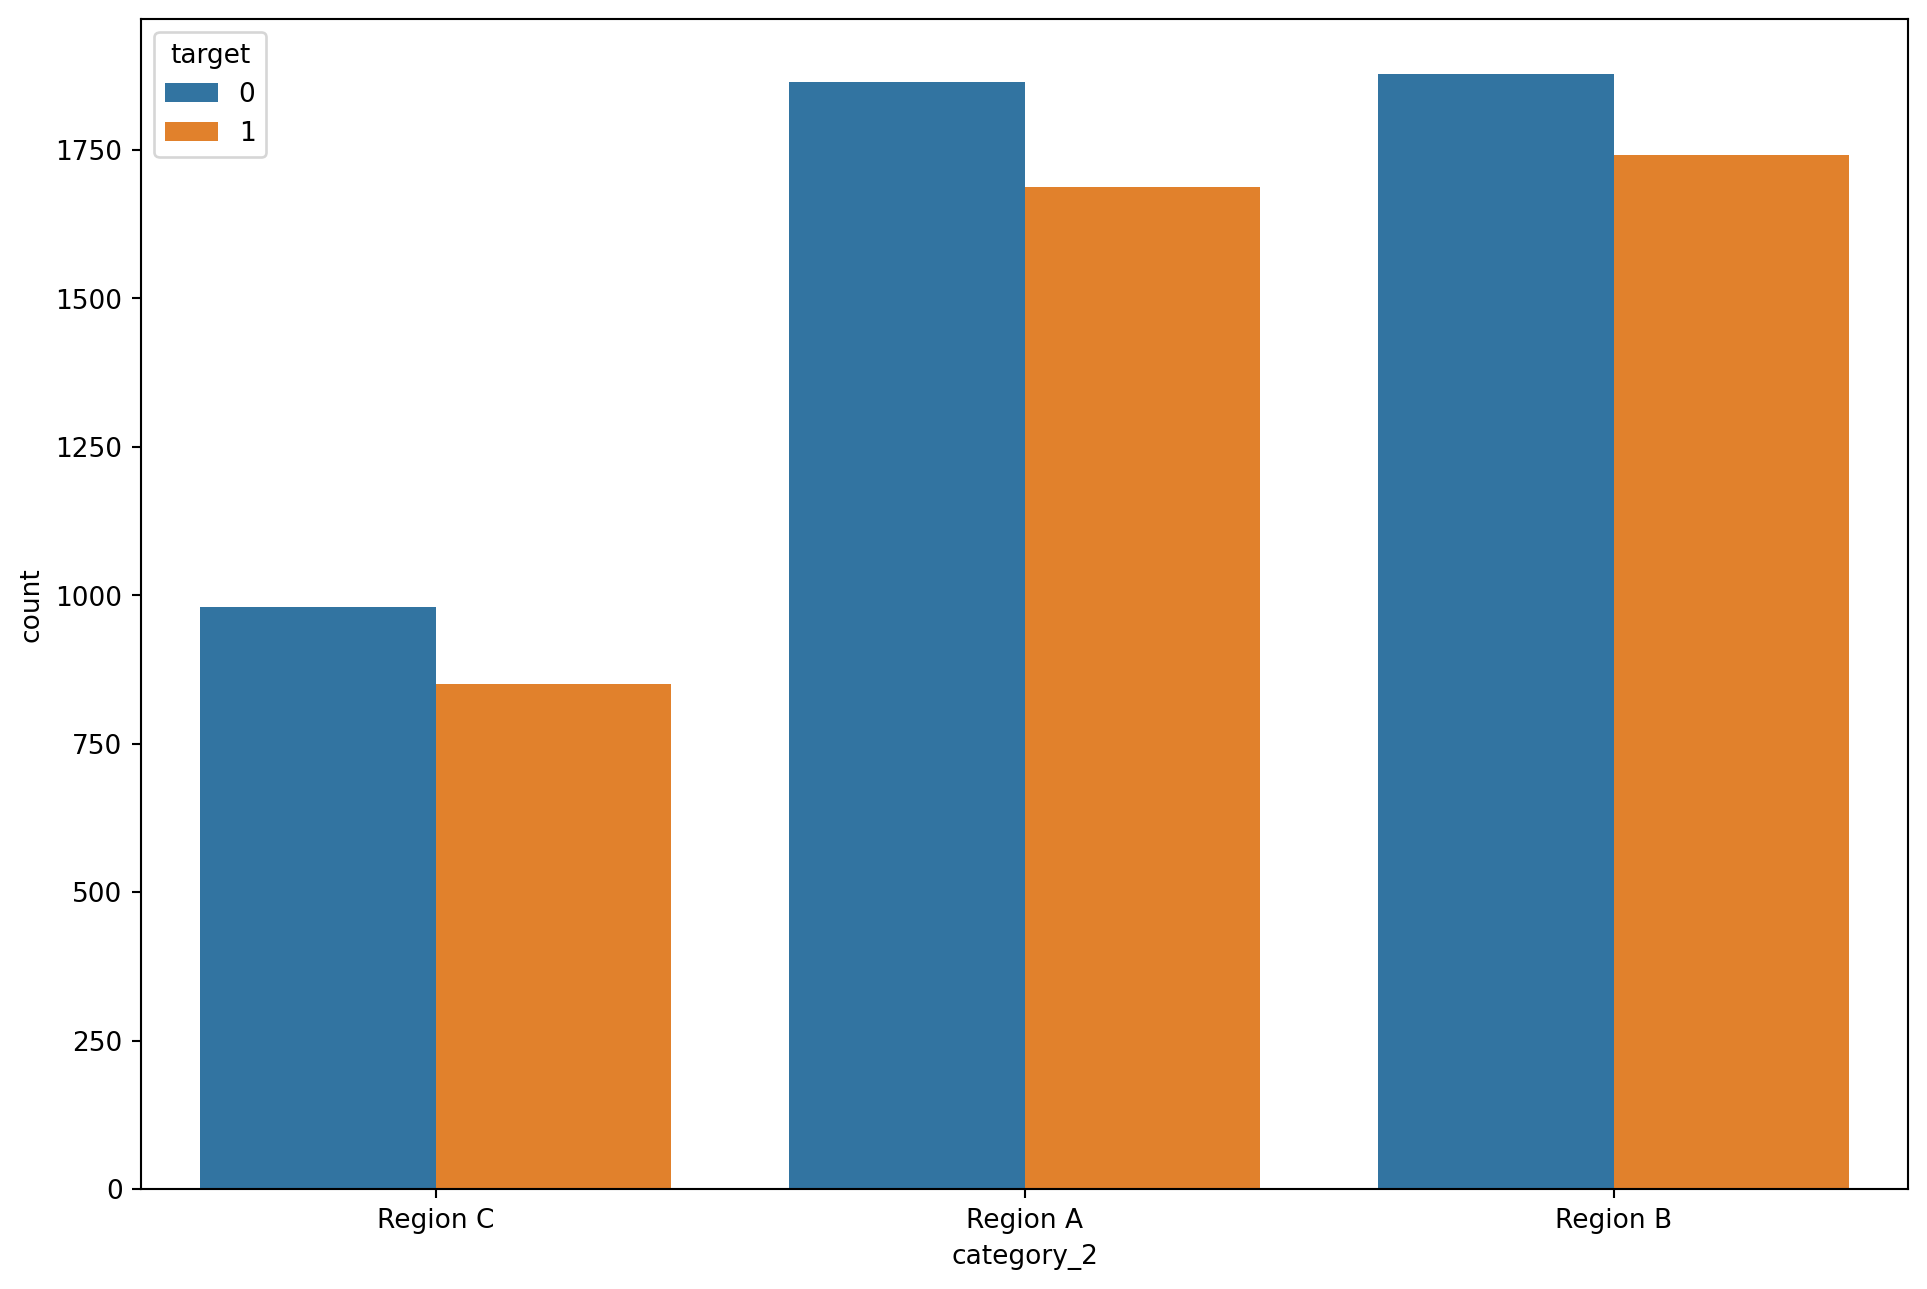

In [58]:
plt.figure(figsize=(12,8), dpi=190)
sb.countplot(data=df,x='category_2', hue='target')

#### data cleaning

In [4]:
Q1 = df['feature_2'].quantile(0.25)
Q3 = df['feature_2'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['feature_2'] = df['feature_2'].clip(lower_bound, upper_bound)

In [5]:
Q1 = df['feature_1'].quantile(0.25)
Q3 = df['feature_1'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['feature_1'] = df['feature_1'].clip(lower_bound, upper_bound)

In [6]:
Q1 = df['feature_3'].quantile(0.25)
Q3 = df['feature_3'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['feature_3'] = df['feature_3'].clip(lower_bound, upper_bound)

In [7]:
Q1 = df['feature_4'].quantile(0.25)
Q3 = df['feature_4'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['feature_4'] = df['feature_4'].clip(lower_bound, upper_bound)

In [8]:
Q1 = df['feature_6'].quantile(0.25)
Q3 = df['feature_6'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['feature_6'] = df['feature_6'].clip(lower_bound, upper_bound)

In [9]:
Q1 = df['feature_7'].quantile(0.25)
Q3 = df['feature_7'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['feature_7'] = df['feature_7'].clip(lower_bound, upper_bound)

In [10]:
Q1 = df['feature_8'].quantile(0.25)
Q3 = df['feature_8'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['feature_8'] = df['feature_8'].clip(lower_bound, upper_bound)

<Axes: >

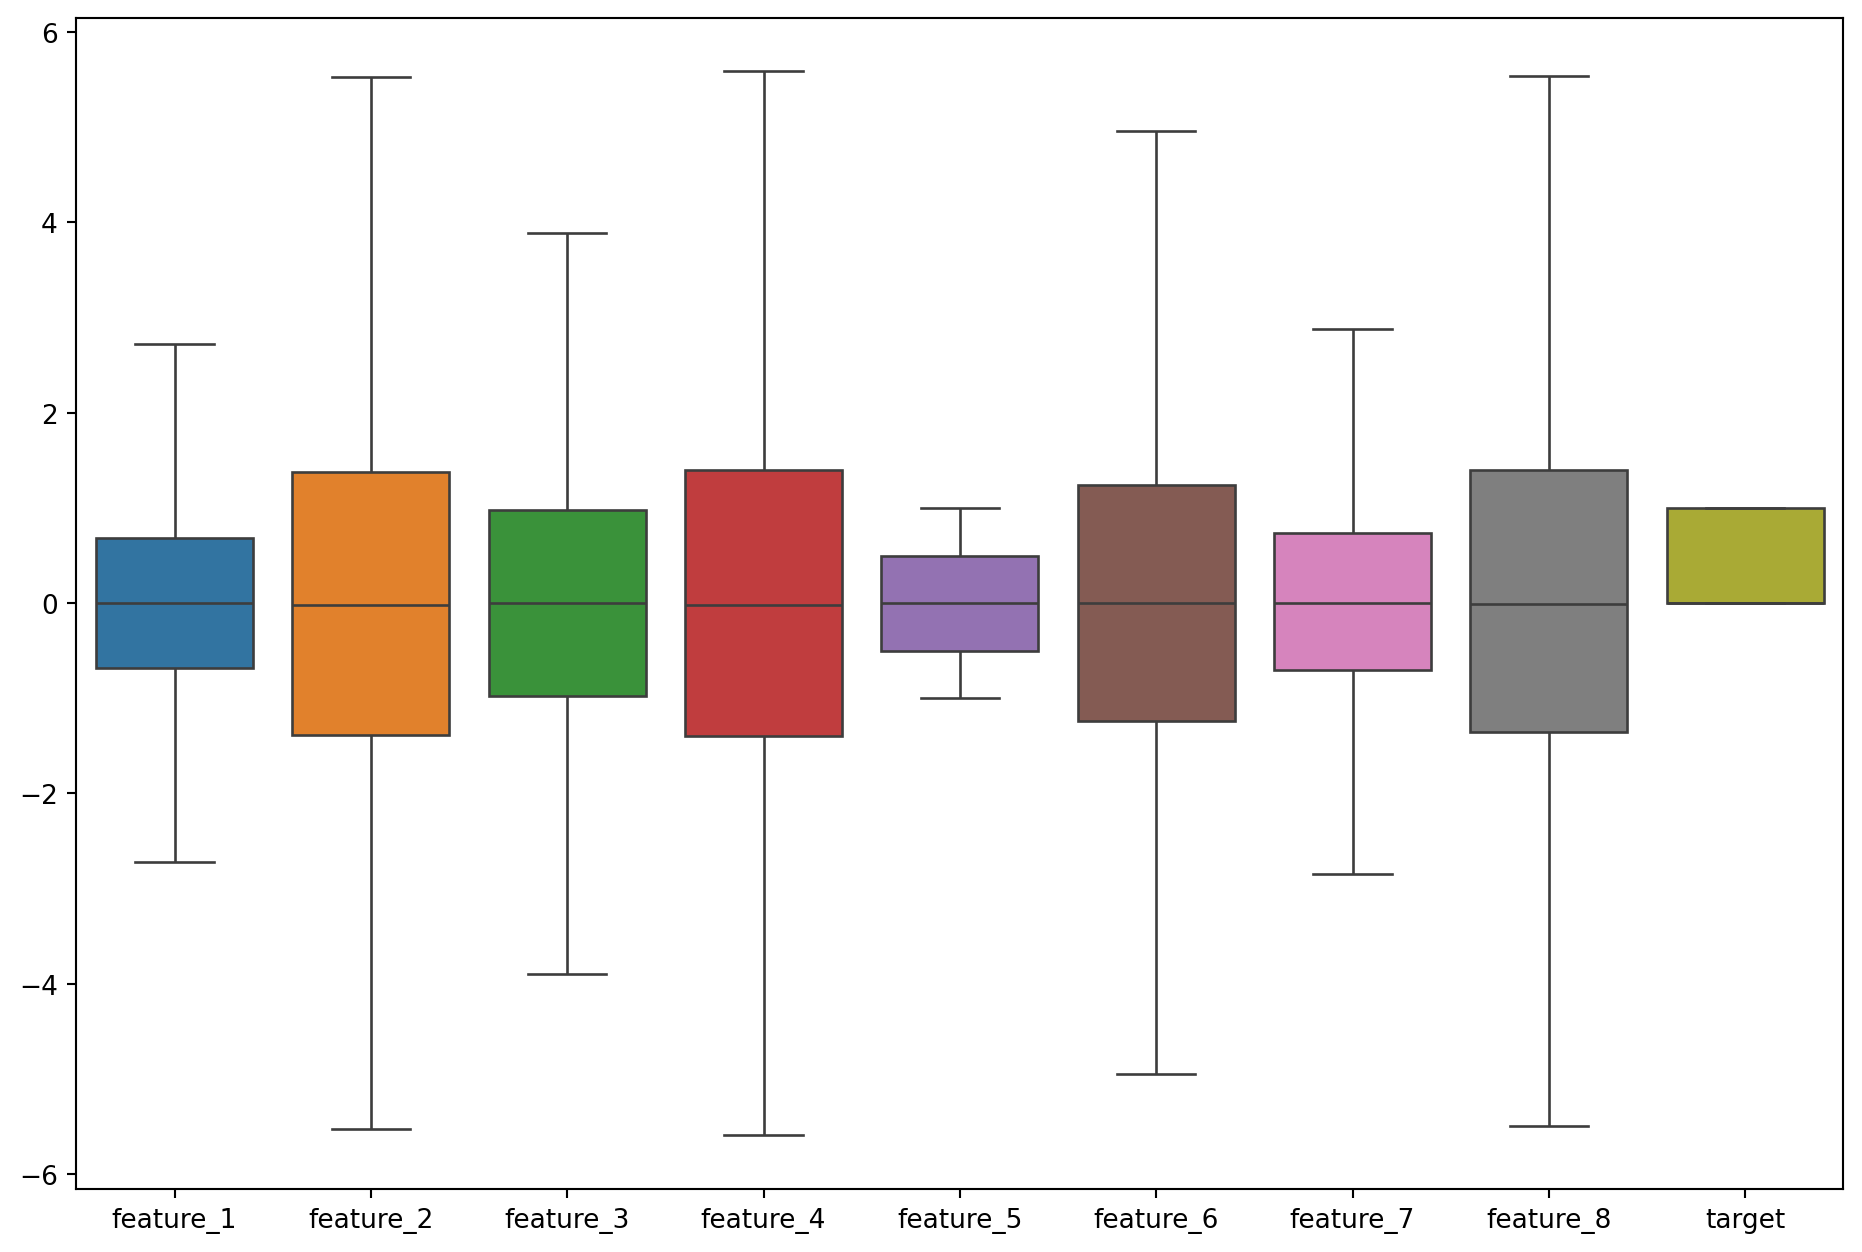

In [66]:
plt.figure(figsize=(12,8), dpi=190)
sb.boxplot(data=df)

## data preprocessing

In [11]:
df_encoded = pd.get_dummies(df, columns=['category_1', 'category_2'], drop_first=True, dtype=int)


In [12]:
df_encoded = df_encoded.rename(columns={
    'category_1_Below Average': 'Below_Average',
    'category_1_High': 'High',
    'category_1_Low': 'Low',
    'category_2_Region B': 'Region_B',
    'category_2_Region C': 'Region_C'})

#### skew

In [69]:
df_encoded.skew()

feature_1        0.009027
feature_2        0.009429
feature_3       -0.001339
feature_4        0.018569
feature_5       -0.008142
feature_6       -0.025151
feature_7       -0.030700
feature_8       -0.019514
target           0.098357
Below_Average    1.582525
High             0.836997
Low              0.815042
Region_B         0.399820
Region_C         1.473593
dtype: float64

#### kurtosis

In [70]:
df_encoded.kurtosis()

feature_1       -0.064427
feature_2       -0.063458
feature_3       -0.084315
feature_4       -0.127841
feature_5       -1.204675
feature_6       -0.059066
feature_7       -0.142957
feature_8       -0.143717
target          -1.990768
Below_Average    0.504497
High            -1.299725
Low             -1.336003
Region_B        -1.840553
Region_C         0.171514
dtype: float64

### corr matrix


In [13]:
df_corr = df_encoded.corr()

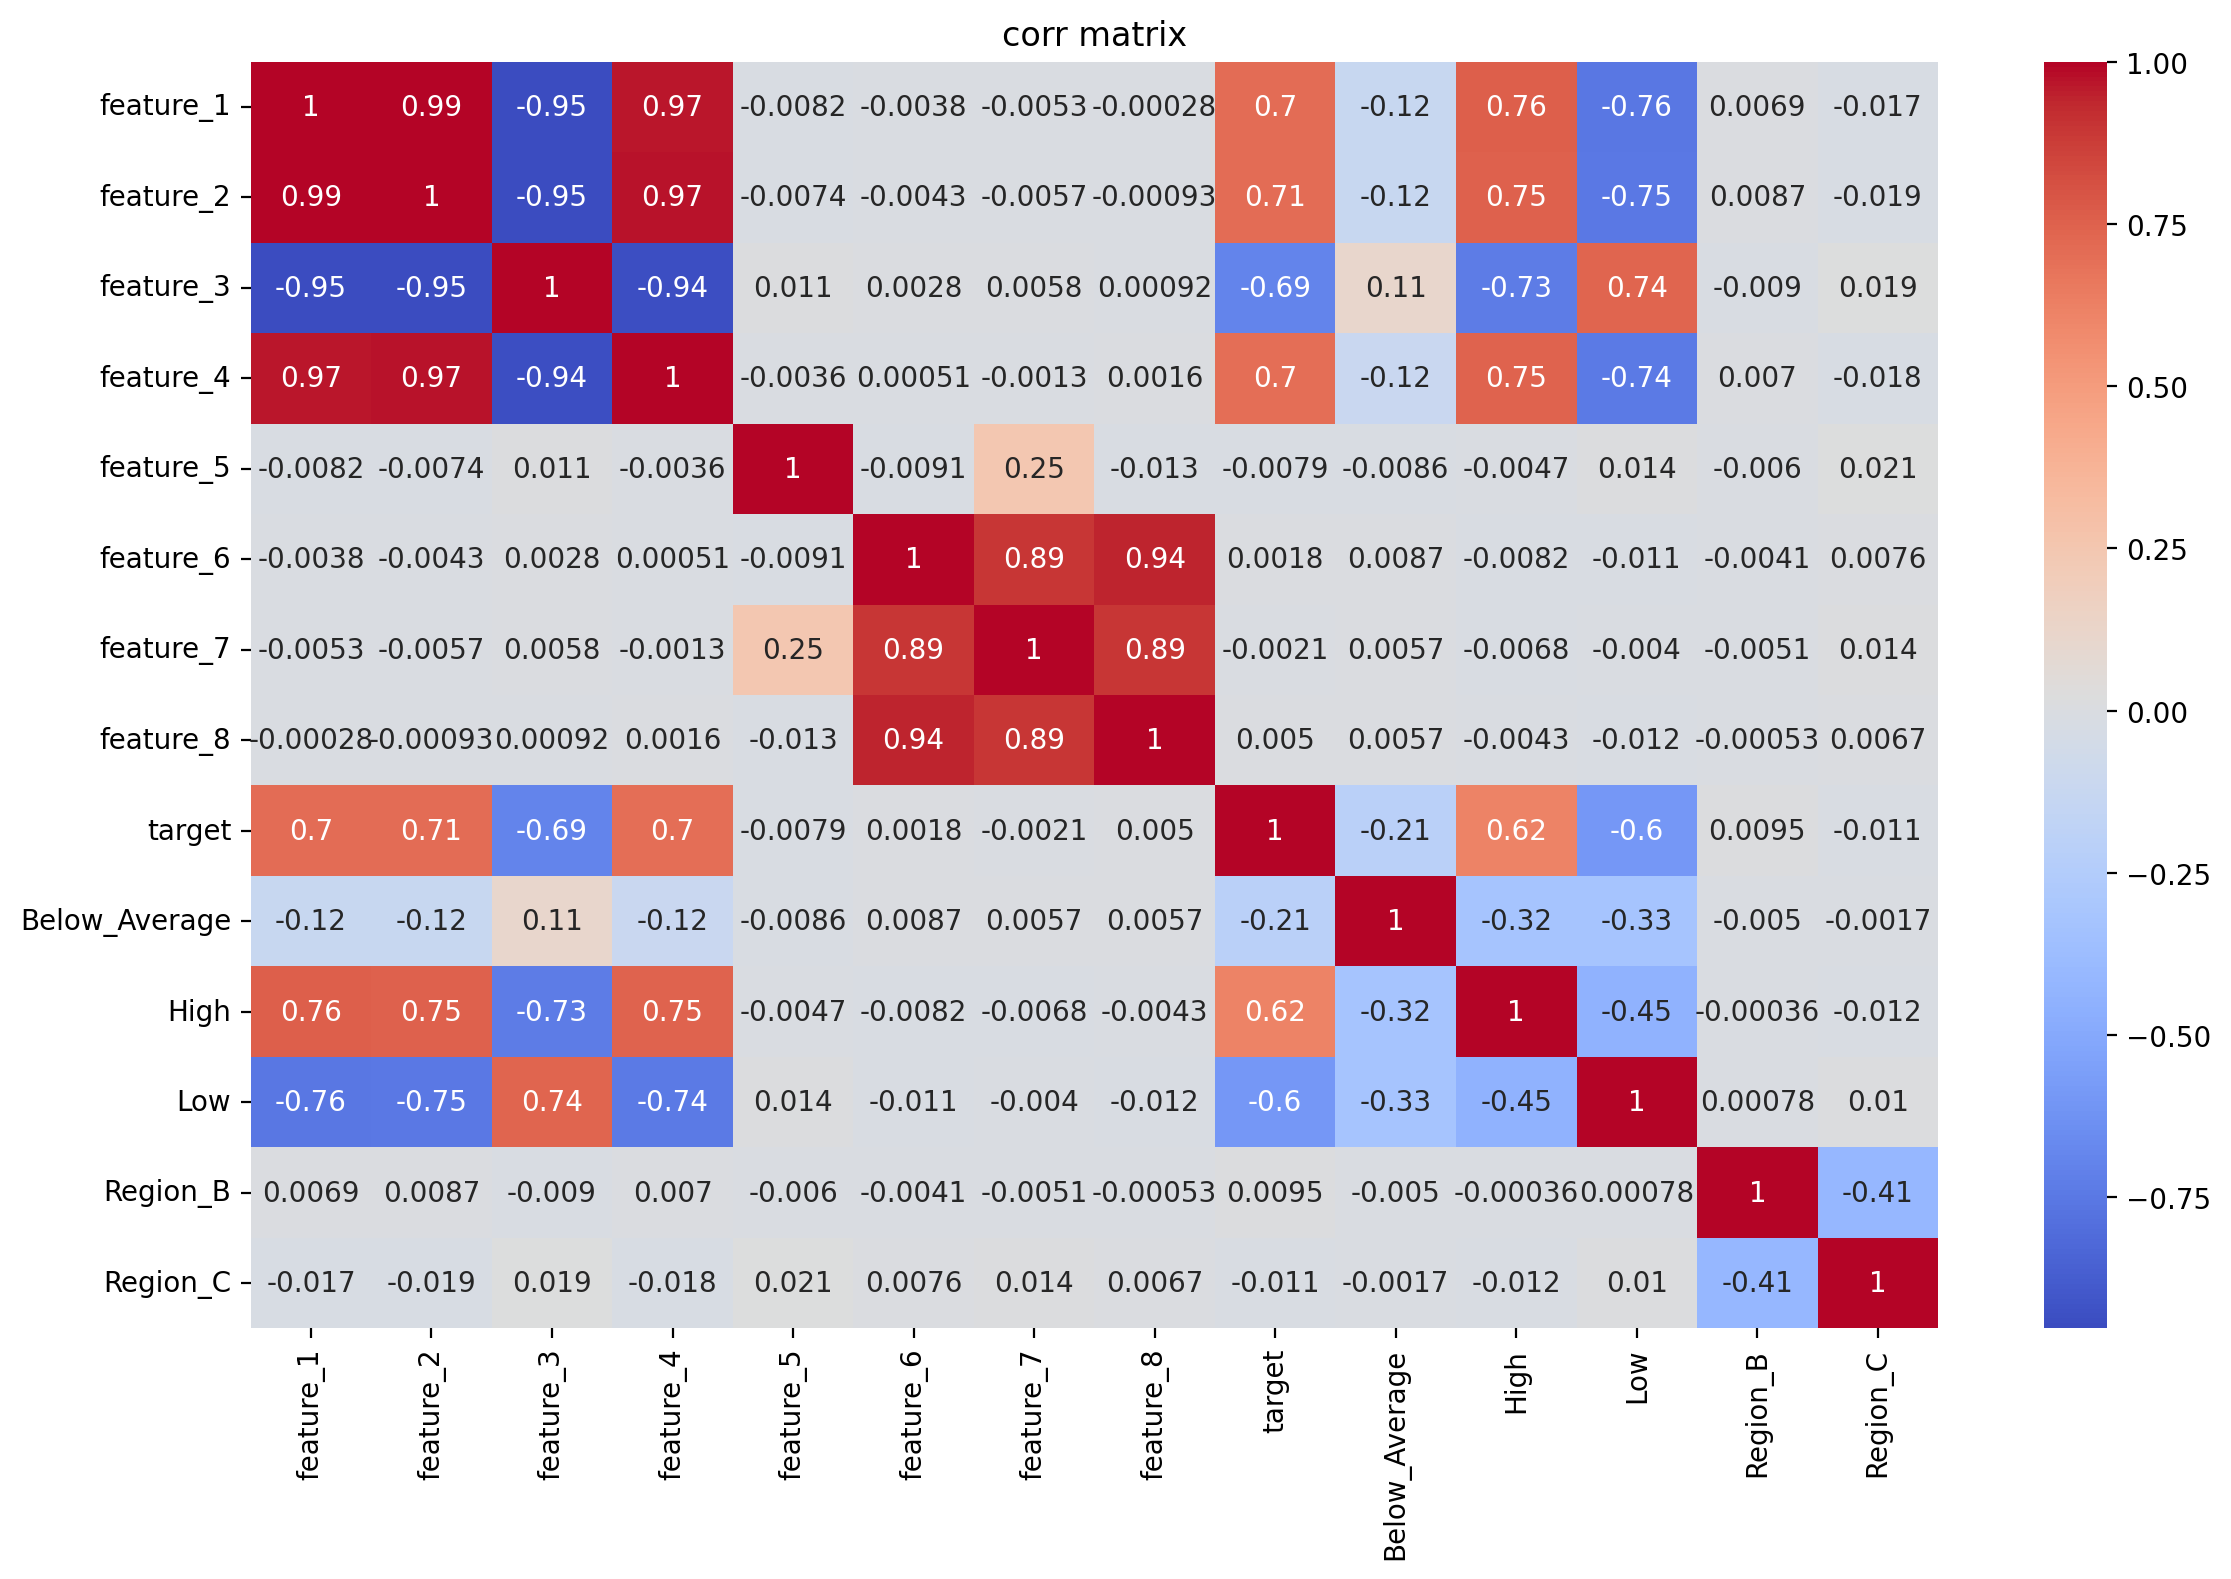

In [72]:
plt.figure(figsize=(12, 8), dpi=200)
sb.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title("corr matrix")
plt.tight_layout()
plt.show()

In [14]:
df_encoded = df_encoded.drop(columns=['feature_2','feature_3','feature_4','feature_7','feature_8'])

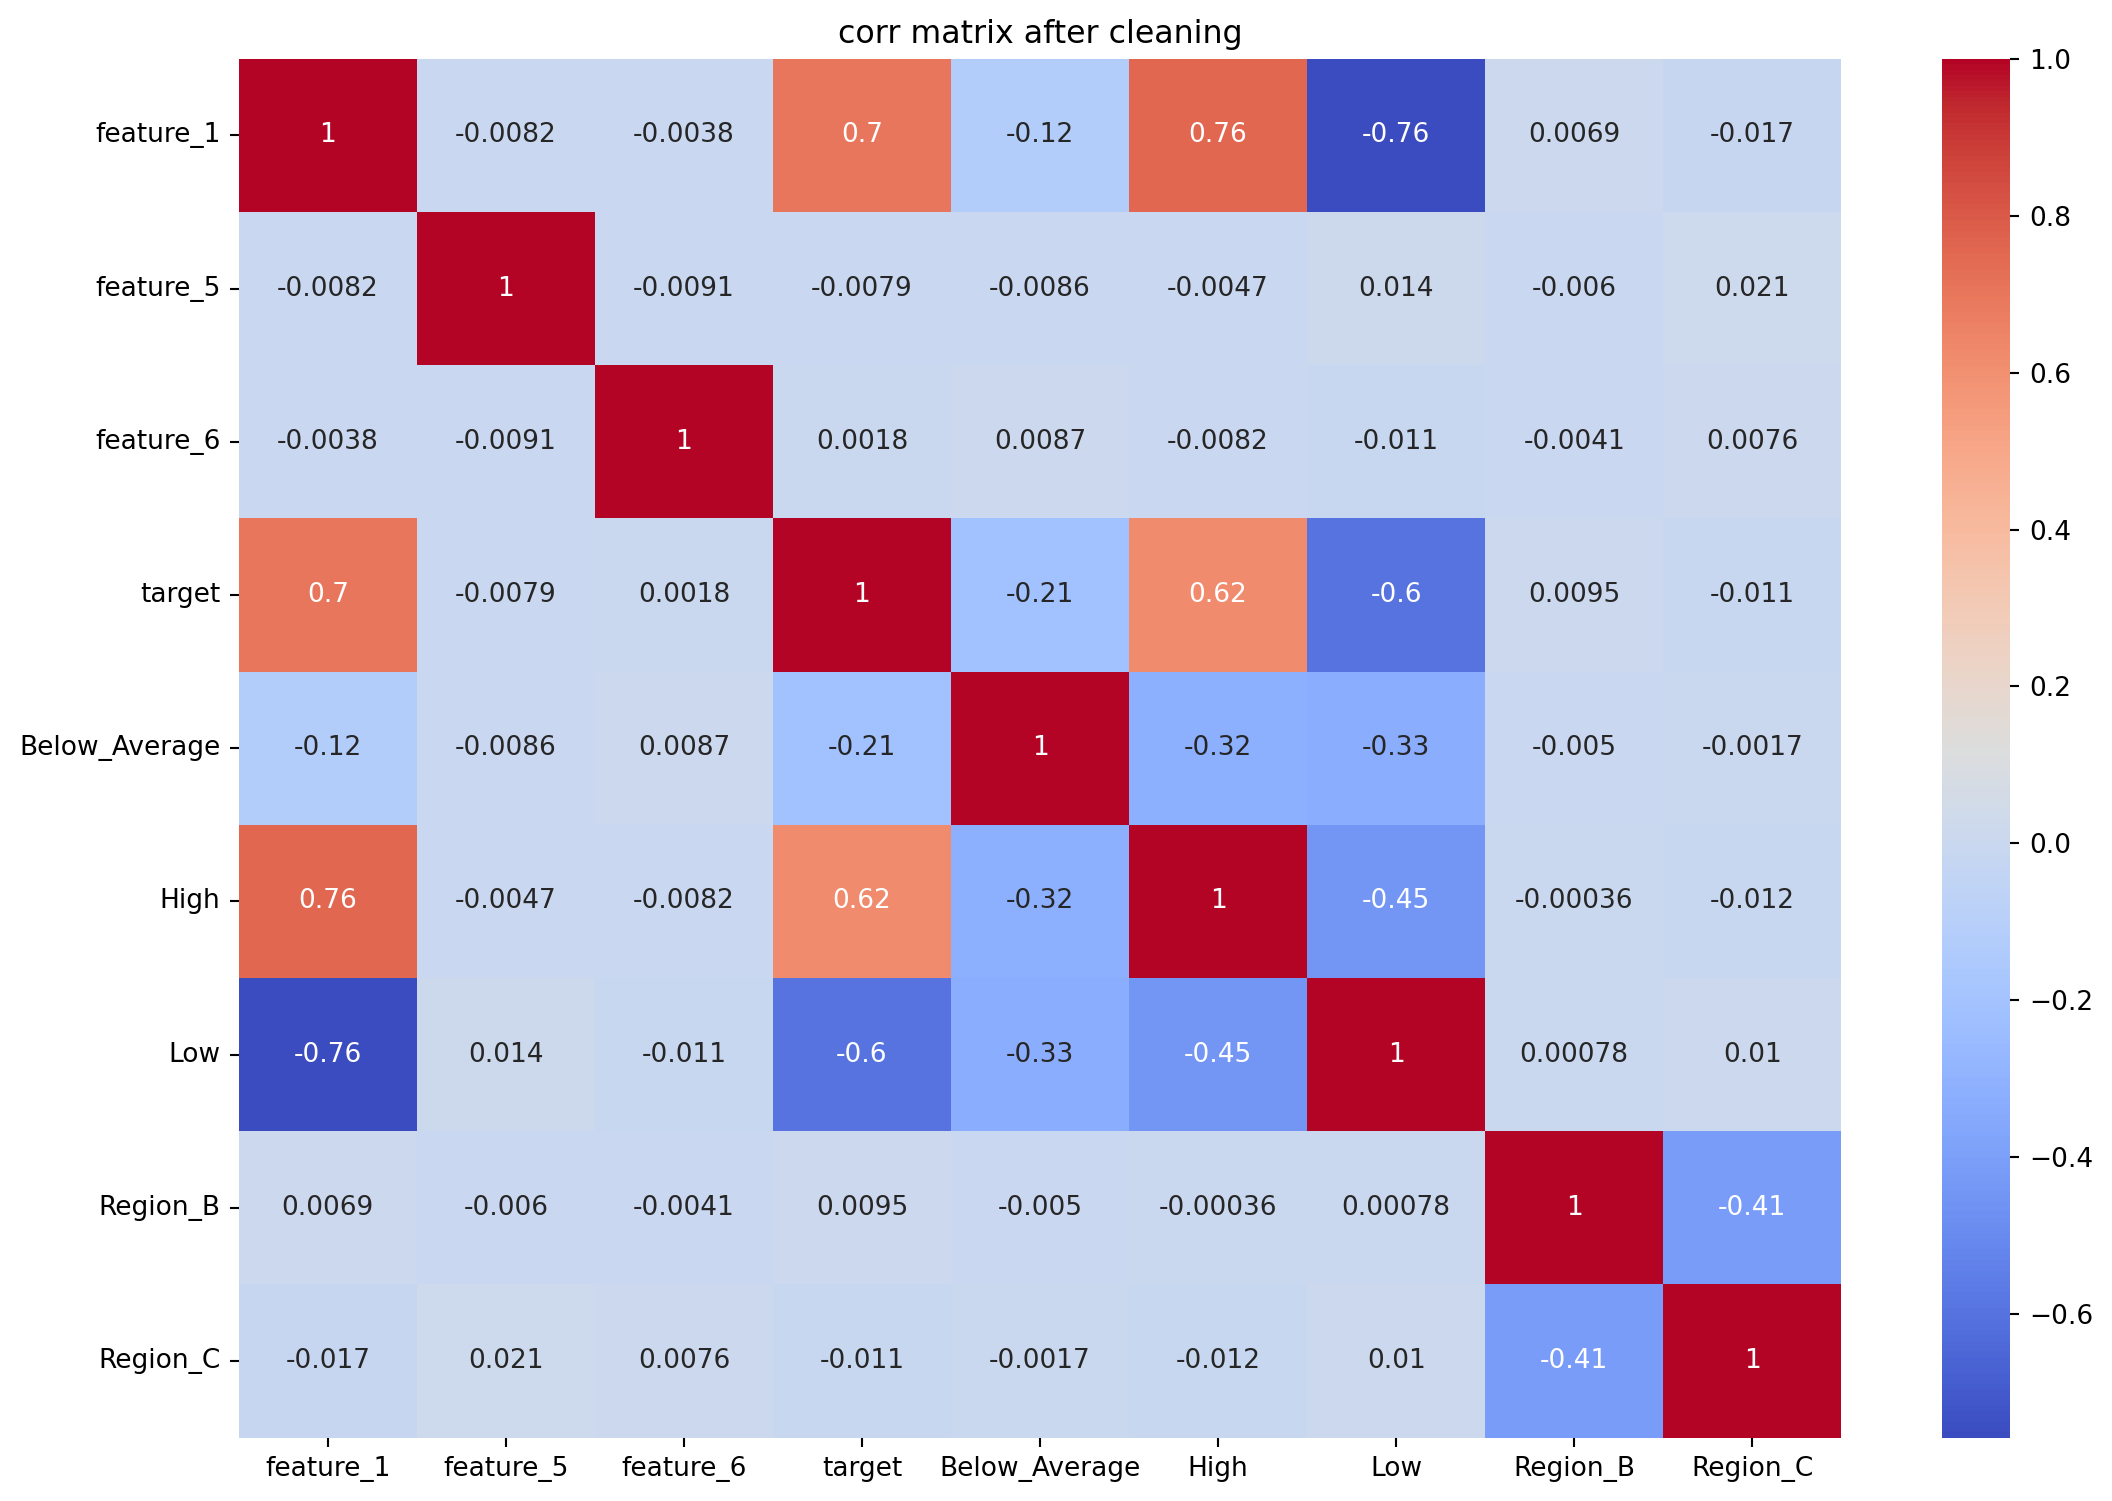

In [74]:
df_corr = df_encoded.corr()

plt.figure(figsize=(12,8), dpi=190)
sb.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.title('corr matrix after cleaning')
plt.tight_layout()

## Draft


In [18]:
df1 = pd.read_csv('dataset_encoded.csv')

In [19]:
df1.head()

,feature_1,feature_5,feature_6,target,Below_Average,High,Low,Region_B,Region_C
0,0.496714,0.784920,-2.209437,1,0,0,0,0,1
1,-0.138264,0.704674,-2.498565,0,1,0,0,0,0
2,0.647689,-0.250029,1.956259,1,0,1,0,0,1
3,1.523030,0.882201,3.445638,1,0,1,0,1,0
4,-0.234153,0.610601,0.211425,0,1,0,0,0,1


In [20]:
X = df1.drop(columns=['target'])
y = df1['target']

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
pol_convert = PolynomialFeatures(degree=2,  include_bias=False)

In [23]:
pol_convert.fit_transform(X)

array([[ 0.49671415,  0.78491978, -2.20943675, ...,  0.        ,
         0.        ,  1.        ],
       [-0.1382643 ,  0.70467422, -2.49856511, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64768854, -0.25002937,  1.95625892, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58844718, -0.93327634,  2.02765825, ...,  0.        ,
         0.        ,  1.        ],
       [-0.68498718, -0.72400123,  2.22894333, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.80118176,  0.70284007, -0.33991769, ...,  0.        ,
         0.        ,  1.        ]])

In [26]:
pol_future = pol_convert.fit_transform(X)

In [27]:
pol_future.shape

(9000, 44)

In [28]:
X.iloc[0]

feature_1        0.496714
feature_5        0.784920
feature_6       -2.209437
Below_Average    0.000000
High             0.000000
Low              0.000000
Region_B         0.000000
Region_C         1.000000
Name: 0, dtype: float64

In [31]:
pol_future[0]

array([ 0.49671415,  0.78491978, -2.20943675,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.24672495,  0.38988076,
       -1.0974585 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.49671415,  0.61609906, -1.7342306 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.78491978,  4.88161074, -0.        ,
       -0.        , -0.        , -0.        , -2.20943675,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ])

In [34]:
from sklearn.linear_model import LinearRegression

In [32]:
X_train, X_test, y_train, y_test = train_test_split(pol_future, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
test_pred = model.predict(X_test)

In [38]:
model.coef_

array([ 4.47780817e-01,  1.69083789e-02, -8.42269520e-03, -9.70497678e-02,
        1.86966534e-01, -2.06087639e-01,  2.29473237e-03,  1.90930670e-02,
        1.65836254e-02,  6.30138424e-04,  8.55966813e-03, -3.77532077e-02,
       -4.47801618e-01, -3.40475198e-01, -2.42225732e-04, -1.96118111e-02,
       -1.45595183e-02,  2.65449679e-04, -3.04669965e-02, -7.48212547e-03,
       -6.93516774e-03, -8.38625699e-03, -6.67426798e-03,  7.73675460e-04,
        2.25283182e-02,  1.67668864e-04,  2.30496703e-02, -3.15744717e-03,
       -7.59693774e-03, -9.70497678e-02,  4.16333634e-17, -2.77555756e-17,
        1.14349373e-02, -3.43047407e-02,  1.86966534e-01,  0.00000000e+00,
       -1.99169025e-02, -3.46642265e-02, -2.06087639e-01, -4.72966454e-03,
       -7.41612396e-02,  2.29473237e-03,  0.00000000e+00,  1.90930670e-02])

In [39]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [40]:
mae = mean_absolute_error(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

MAE: 0.20868615158374632, MSE: 0.10053803655032593, RMSE: 0.31707733528324905


In [41]:
# создать различные степени полинома
# разбить на train/test
# обучить модель
# сохранить метрики rmse для обучения и теста
# нарисовать графики с результатами  ошибка по степеням полинома

In [42]:
train_rsme_errors = []
test_rsme_errors = []

In [43]:
for degree in range(1, 10):
    pol_convert = PolynomialFeatures(degree=degree, include_bias=False)
    pol_future = pol_convert.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(pol_future, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rsme_errors.append(train_rmse)
    test_rsme_errors.append(test_rmse)

In [44]:
train_rsme_errors

[0.3253882662133454,
 0.32140385542944655,
 0.31740847280592815,
 0.31442630768521396,
 0.31030106839800325,
 0.3036180940937848,
 0.2952848134058002,
 0.2819831747458364,
 0.26803434129048825]

In [45]:
test_rsme_errors

[0.3201075771631397,
 0.31707733528324905,
 0.31515880908044636,
 0.3654068597567711,
 3.3414124036630435,
 36.889223469206264,
 1081.9022103574744,
 11476.738420127265,
 452832.20242340595]

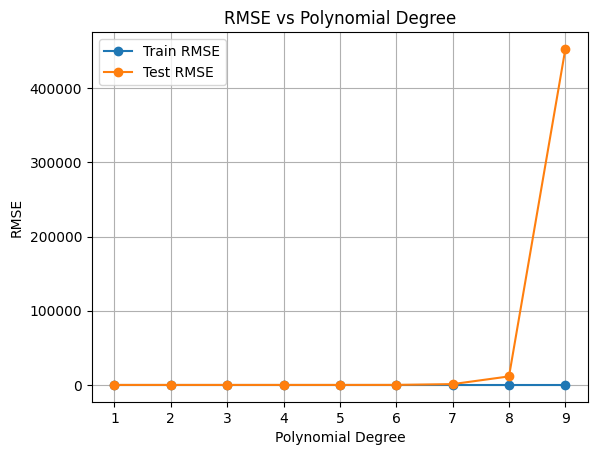

In [48]:
plt.plot(range(1, 10), train_rsme_errors, label='Train RMSE', marker='o')
plt.plot(range(1, 10), test_rsme_errors, label='Test RMSE', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs Polynomial Degree')
plt.legend()
plt.grid()
plt.show()

In [49]:
final_poly_conver = PolynomialFeatures(degree=3, include_bias=False)

In [50]:
final_model = LinearRegression()

In [51]:
full_conve_X =  final_poly_conver.fit_transform(X)

In [52]:
final_model.fit(full_conve_X, y)

LinearRegression()

In [54]:
from joblib import dump, load
dump(final_model, 'final_model.joblib')
dump(final_poly_conver, 'final_poly_conver.joblib')

['final_poly_conver.joblib']

## Model Building & Training

In [17]:
df_encoded.to_csv('dataset_encoded.csv', index=False)

In [15]:

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [76]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64']))

In [77]:

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [78]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),  # suppress warning
    'CatBoost': CatBoostClassifier(verbose=0)  # suppress training output
}


for name, model in models.items():
    scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='f1')
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std():.4f})")

Logistic Regression: 0.8595 (+/- 0.0140)
Random Forest: 0.8589 (+/- 0.0172)
Gradient Boosting: 0.8549 (+/- 0.0185)
Decision Tree: 0.8121 (+/- 0.0132)


/Users/ka53/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [22:04:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ka53/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [22:04:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ka53/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [22:04:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ka53/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [22:04:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

XGBoost: 0.8523 (+/- 0.0149)
CatBoost: 0.8591 (+/- 0.0130)


In [79]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1  
)

grid_search.fit(X_train_res, y_train_res)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [80]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       944
           1       0.84      0.86      0.85       856

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800

ROC-AUC: 0.8560658561698083


<Figure size 640x480 with 0 Axes>

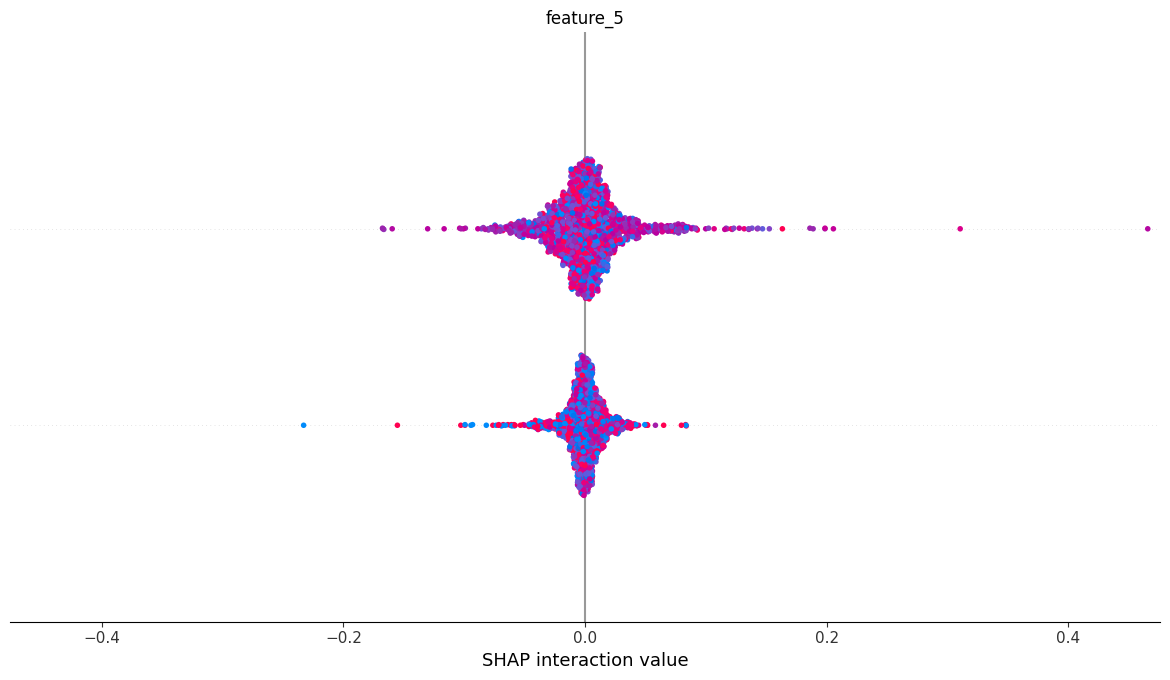

In [81]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_train.columns)

In [82]:
def log_metrics(model_name, params, metrics):
    log_entry = {
        'timestamp': datetime.now().isoformat(),
        'model': model_name,
        'parameters': params,
        'metrics': metrics
    }
    

metrics = {
    'accuracy': 0.85,
    'roc_auc': 0.91,
    'f1_score': 0.85
}
log_metrics('RandomForest', {'n_estimators': 100}, metrics)

#### logistic regression & decision tree

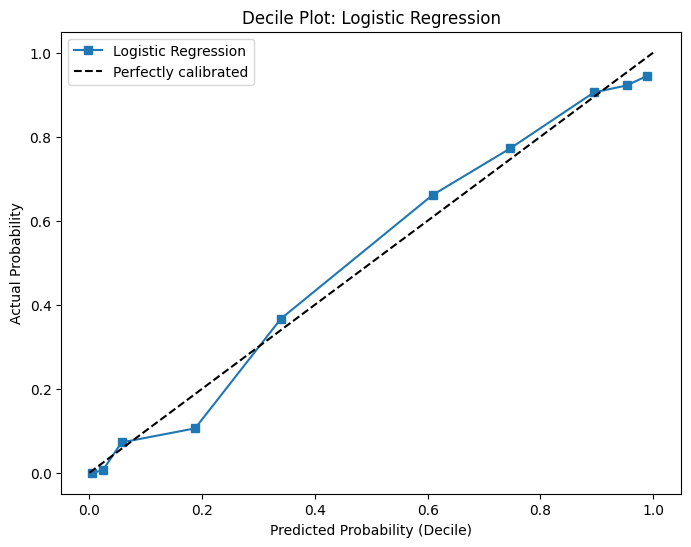

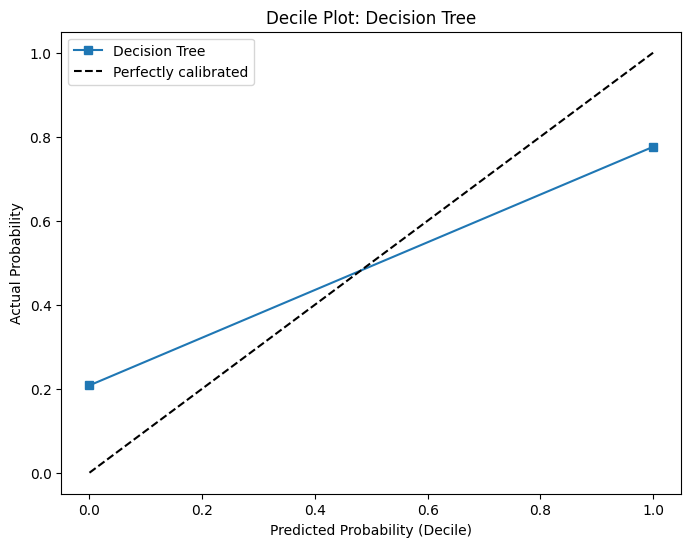

In [83]:
def plot_decile_curve(y_true, y_proba, model_name):
    prob_true, prob_pred = calibration_curve(y_true, y_proba, n_bins=10, strategy='quantile')
    
    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, 's-', label=model_name)
    plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
    plt.xlabel('Predicted Probability (Decile)')
    plt.ylabel('Actual Probability')
    plt.title(f'Decile Plot: {model_name}')
    plt.legend()
    plt.show()

lr = LogisticRegression().fit(X_train, y_train)
plot_decile_curve(y_test, lr.predict_proba(X_test)[:,1], 'Logistic Regression')

dt = DecisionTreeClassifier().fit(X_train, y_train)
plot_decile_curve(y_test, dt.predict_proba(X_test)[:,1], 'Decision Tree')


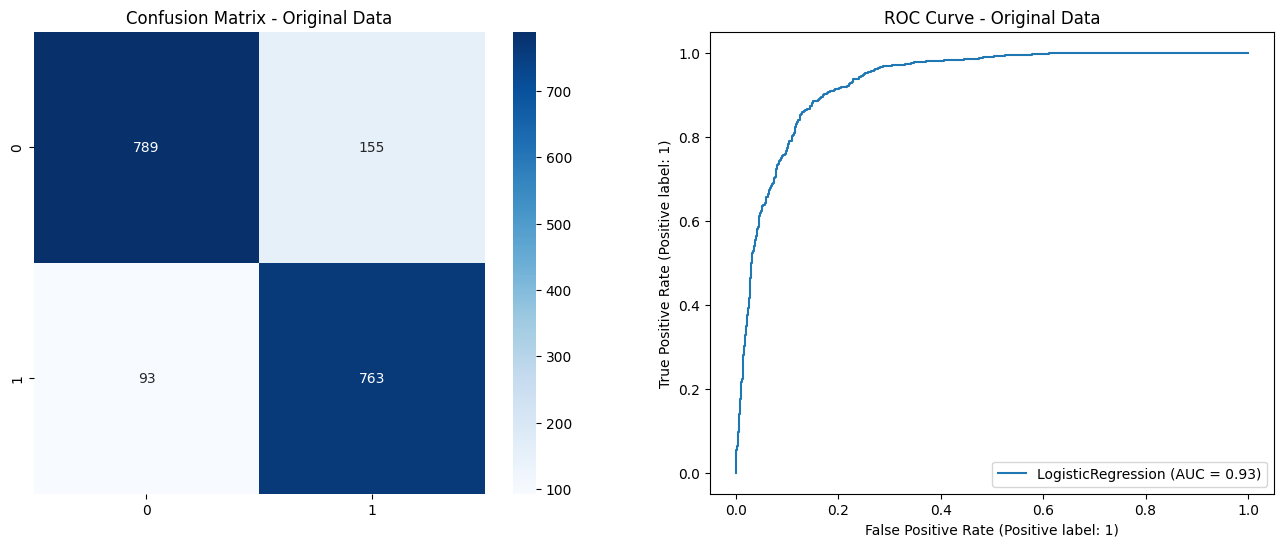

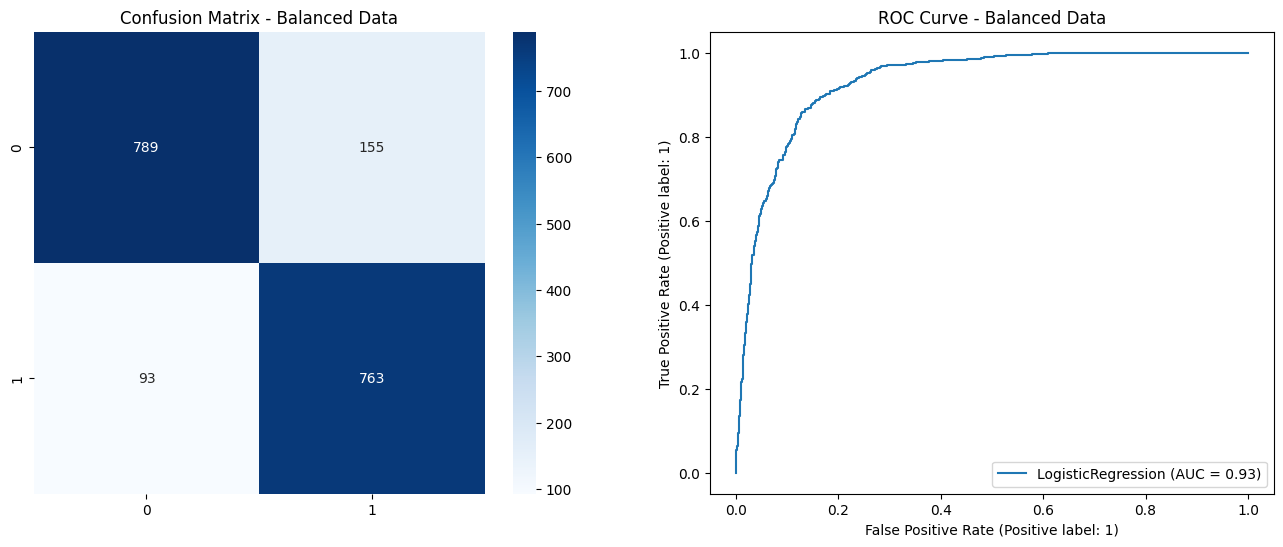

In [84]:
def plot_confusion_roc(model, X, y, case_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Confusion Matrix
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {case_name}')
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X, y, ax=ax2)
    ax2.set_title(f'ROC Curve - {case_name}')
    plt.show()

# Первый случай (например, до балансировки)
plot_confusion_roc(lr, X_test, y_test, 'Original Data')

# Второй случай (после балансировки)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
lr_balanced = LogisticRegression().fit(X_res, y_res)
plot_confusion_roc(lr_balanced, X_test, y_test, 'Balanced Data')

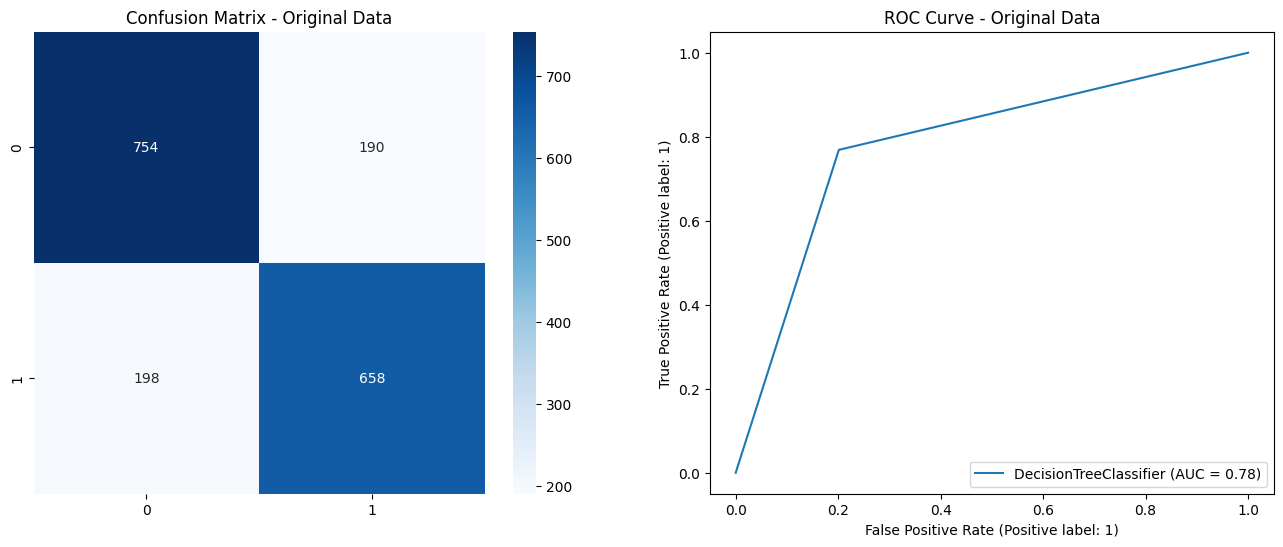

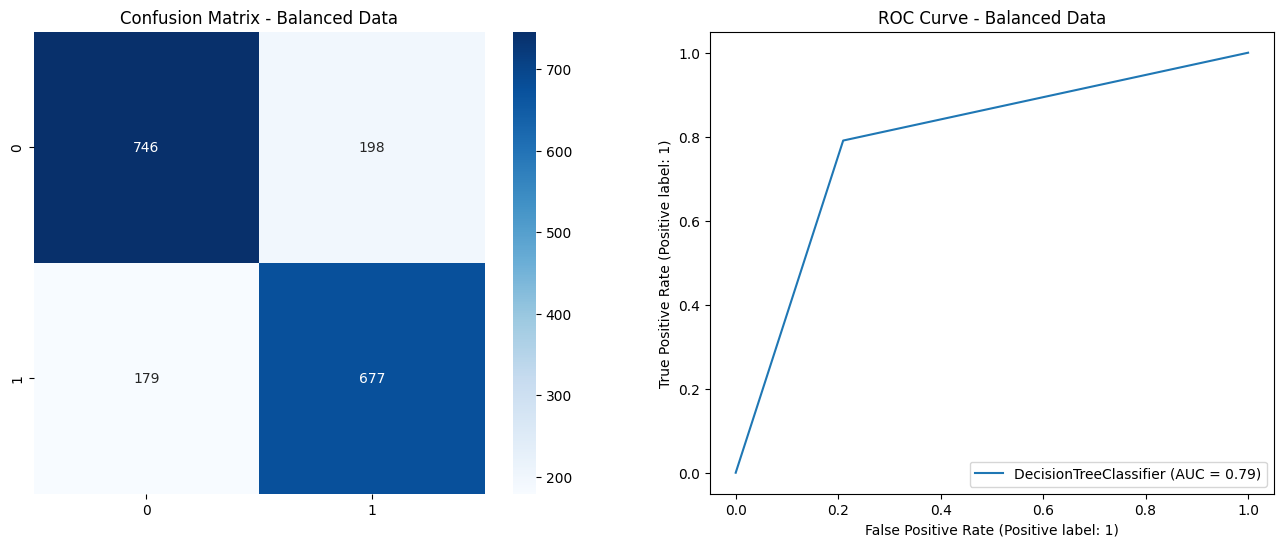

In [85]:
def plot_confusion_roc(model, X, y, case_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Confusion Matrix
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {case_name}')
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X, y, ax=ax2)
    ax2.set_title(f'ROC Curve - {case_name}')
    plt.show()

# Первый случай (например, до балансировки)
plot_confusion_roc(dt, X_test, y_test, 'Original Data')

# Второй случай (после балансировки)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
dt_balanced = DecisionTreeClassifier().fit(X_res, y_res)
plot_confusion_roc(dt_balanced, X_test, y_test, 'Balanced Data')

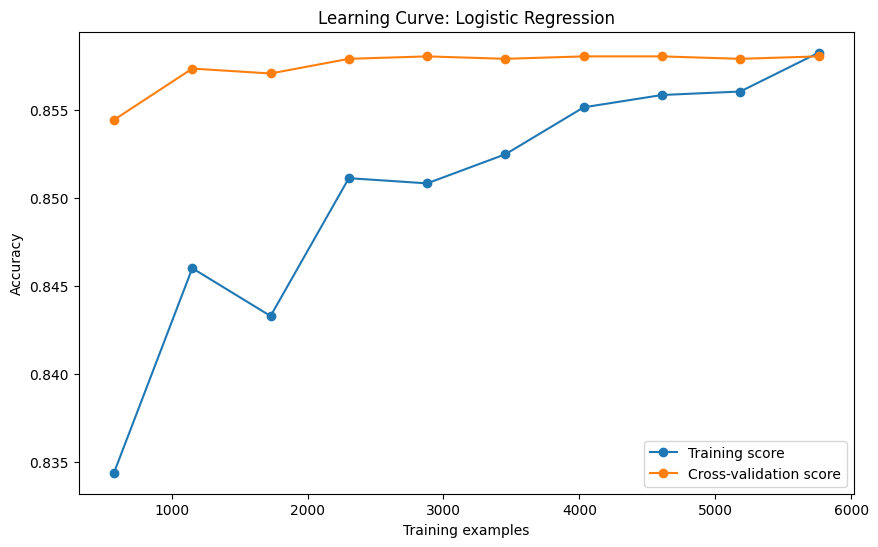

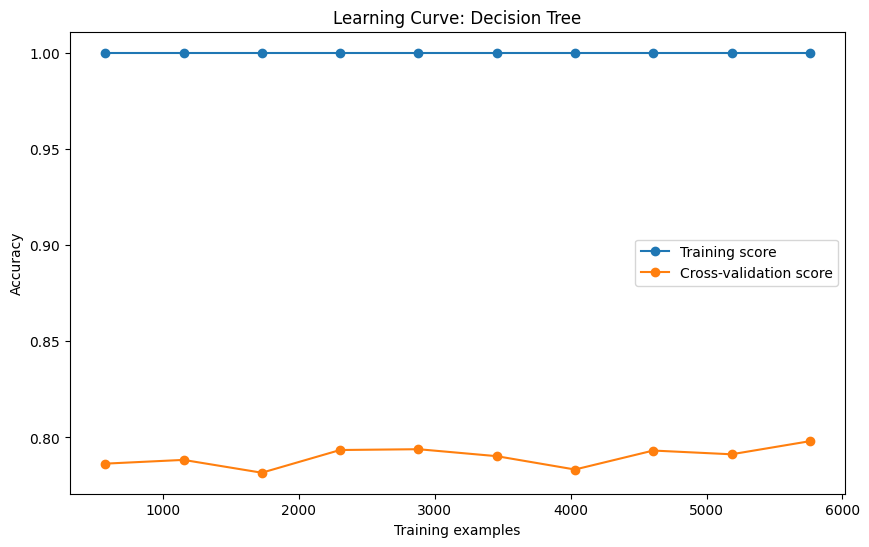

In [86]:
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve: {model_name}')
    plt.legend()
    plt.show()

plot_learning_curve(lr, X_train, y_train, 'Logistic Regression')
plot_learning_curve(dt, X_train, y_train, 'Decision Tree') 

#### random fores & gradient boosting 

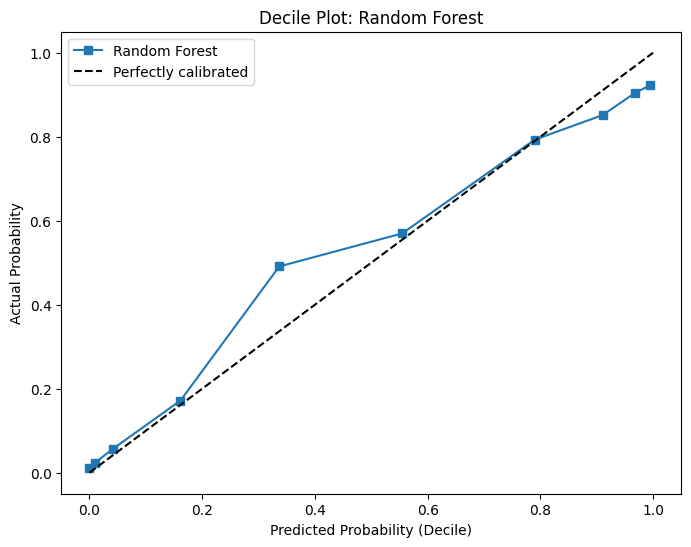

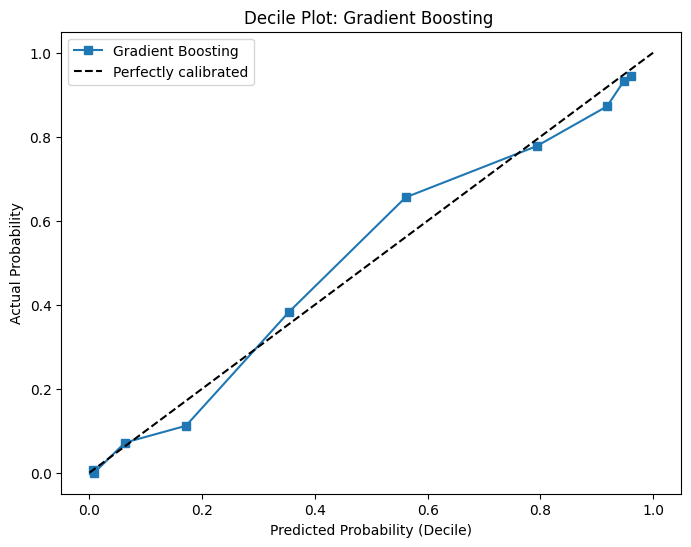

In [87]:
def plot_decile_curve(y_true, y_proba, model_name):
    prob_true, prob_pred = calibration_curve(y_true, y_proba, n_bins=10, strategy='quantile')
    
    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, 's-', label=model_name)
    plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
    plt.xlabel('Predicted Probability (Decile)')
    plt.ylabel('Actual Probability')
    plt.title(f'Decile Plot: {model_name}')
    plt.legend()
    plt.show()

rf = RandomForestClassifier().fit(X_train, y_train)
plot_decile_curve(y_test, rf.predict_proba(X_test)[:,1], 'Random Forest')

gb = GradientBoostingClassifier().fit(X_train, y_train)
plot_decile_curve(y_test, gb.predict_proba(X_test)[:,1], 'Gradient Boosting ')

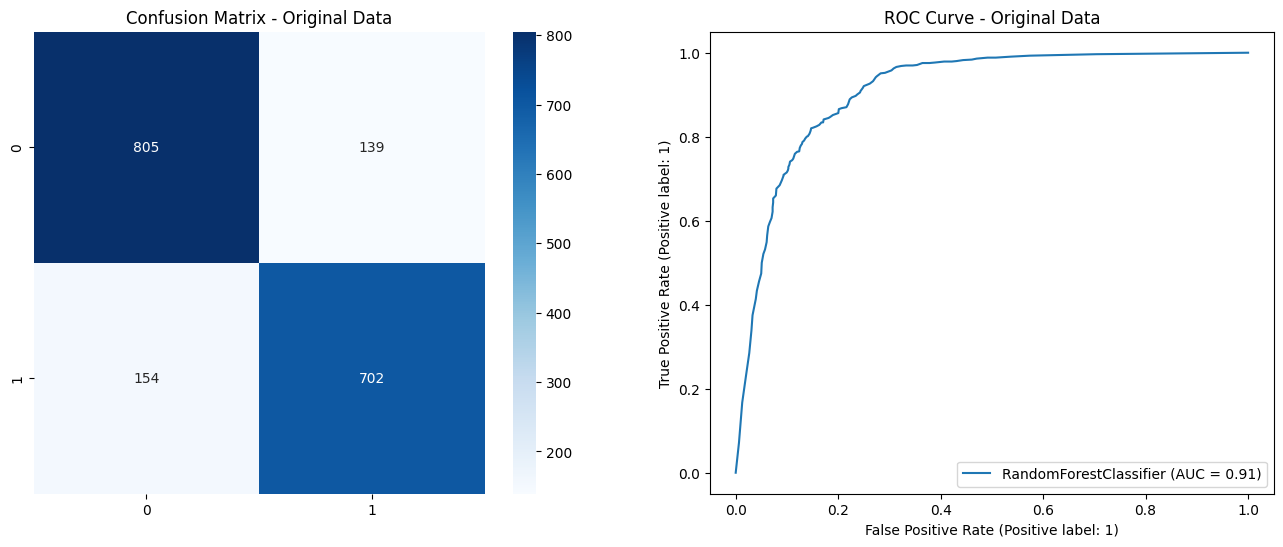

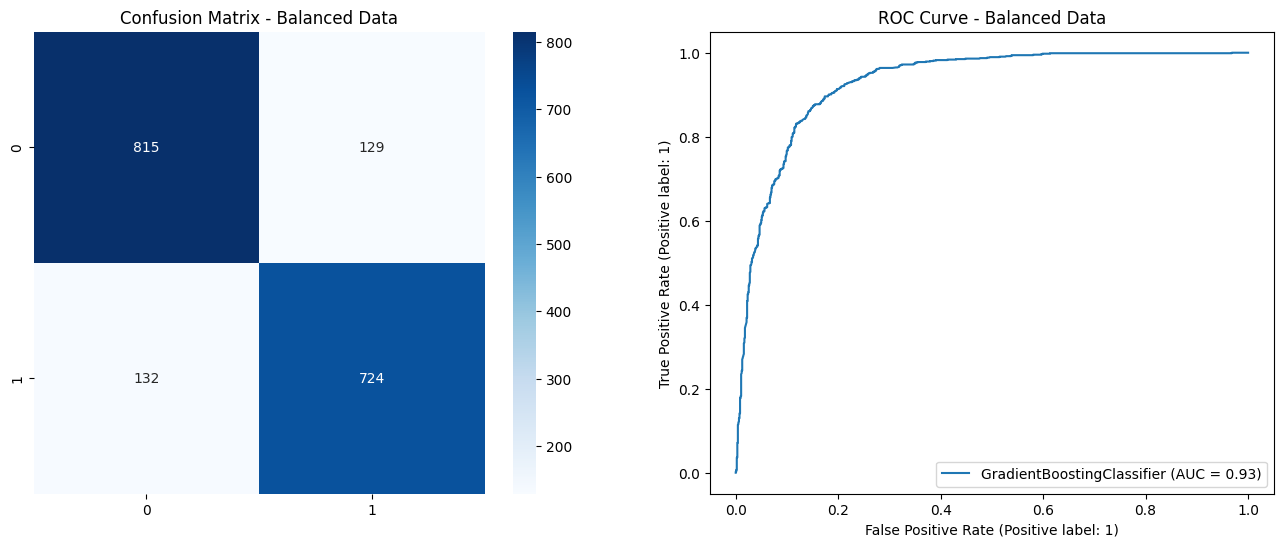

In [88]:

def plot_confusion_roc(model, X, y, case_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Confusion Matrix
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {case_name}')
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X, y, ax=ax2)
    ax2.set_title(f'ROC Curve - {case_name}')
    plt.show()

# Первый случай (например, до балансировки)
plot_confusion_roc(rf, X_test, y_test, 'Original Data')

# Второй случай (после балансировки)

smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
lf_balanced = GradientBoostingClassifier().fit(X_res, y_res)
plot_confusion_roc(lf_balanced, X_test, y_test, 'Balanced Data')



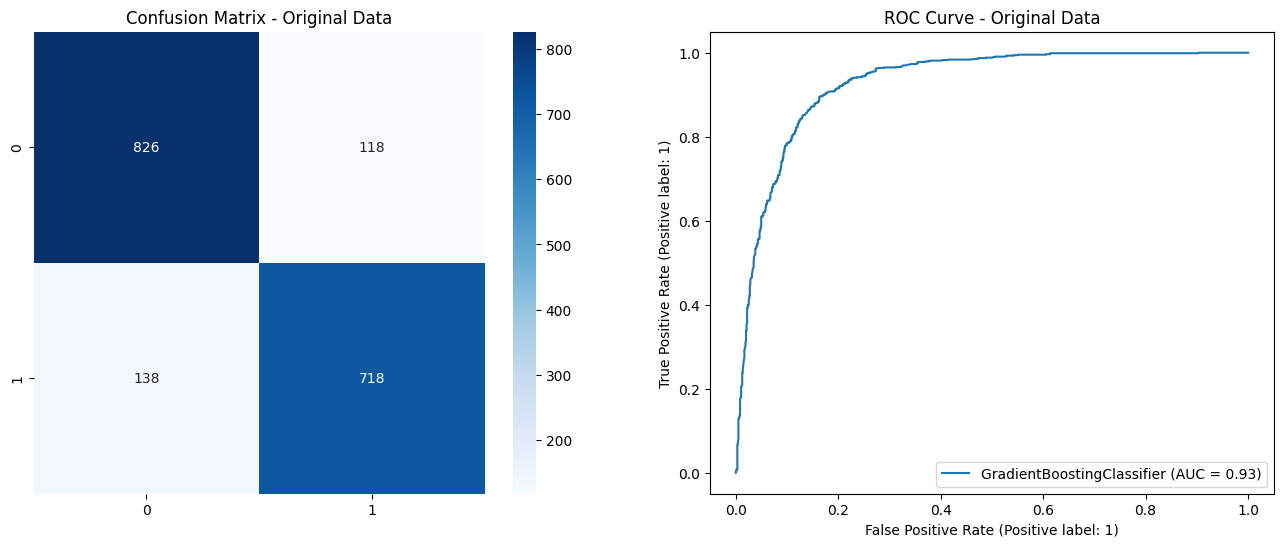

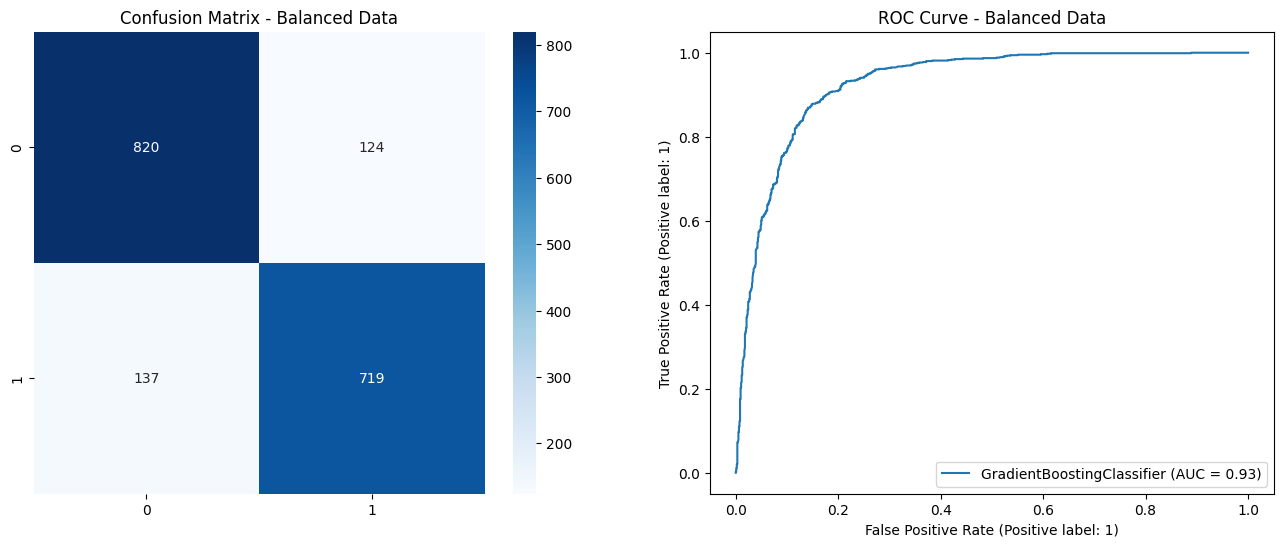

In [89]:


def plot_confusion_roc(model, X, y, case_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Confusion Matrix
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {case_name}')
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X, y, ax=ax2)
    ax2.set_title(f'ROC Curve - {case_name}')
    plt.show()

# Первый случай (например, до балансировки)
plot_confusion_roc(gb, X_test, y_test, 'Original Data')

# Второй случай (после балансировки)

smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
gb_balanced = GradientBoostingClassifier().fit(X_res, y_res)
plot_confusion_roc(gb_balanced, X_test, y_test, 'Balanced Data')



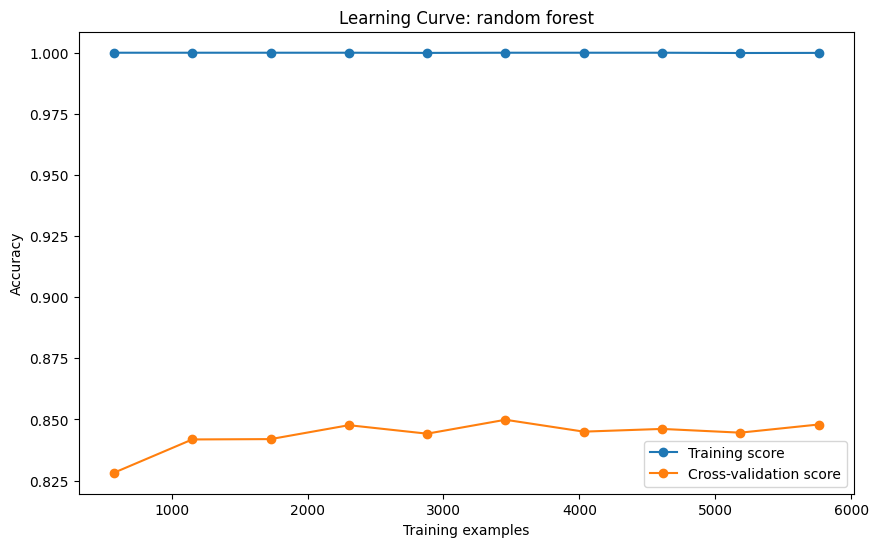

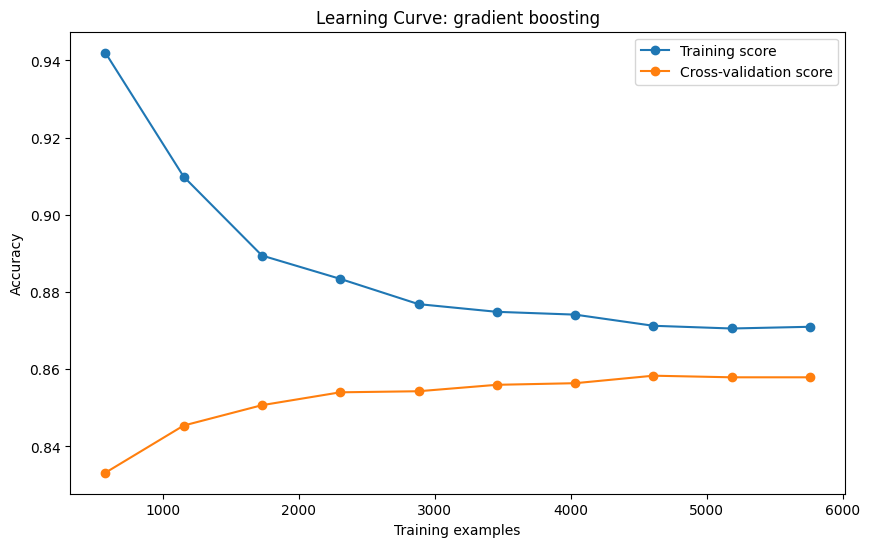

In [90]:

def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve: {model_name}')
    plt.legend()
    plt.show()

plot_learning_curve(rf, X_train, y_train, 'random forest')
plot_learning_curve(gb, X_train, y_train, 'gradient boosting') 

#### knn * GaussianNB



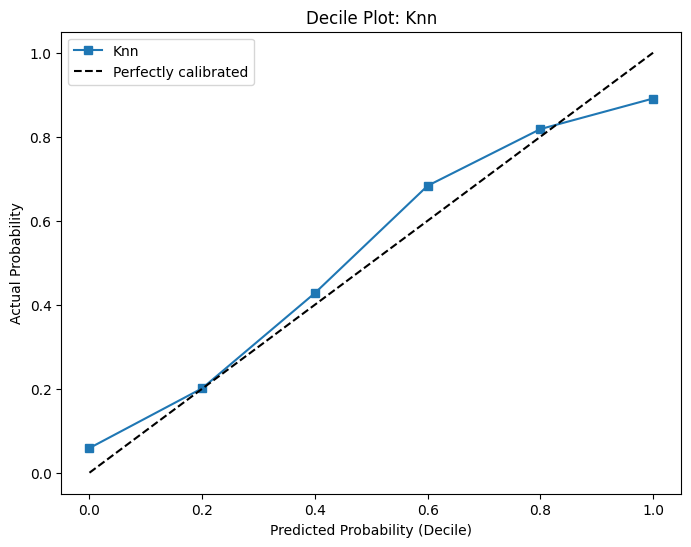

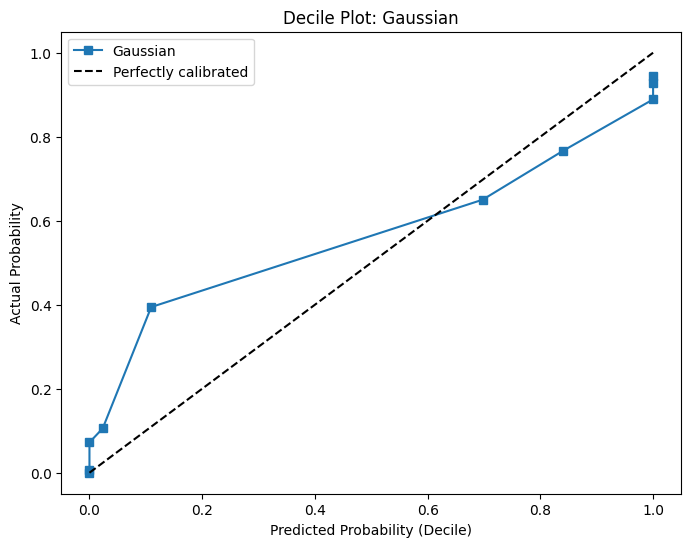

In [91]:

def plot_decile_curve(y_true, y_proba, model_name):
    prob_true, prob_pred = calibration_curve(y_true, y_proba, n_bins=10, strategy='quantile')
    
    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, 's-', label=model_name)
    plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
    plt.xlabel('Predicted Probability (Decile)')
    plt.ylabel('Actual Probability')
    plt.title(f'Decile Plot: {model_name}')
    plt.legend()
    plt.show()




knn = KNeighborsClassifier().fit(X_train, y_train)
plot_decile_curve(y_test, knn.predict_proba(X_test)[:,1], 'Knn')



g = GaussianNB().fit(X_train, y_train)
plot_decile_curve(y_test, g.predict_proba(X_test)[:,1], 'Gaussian')

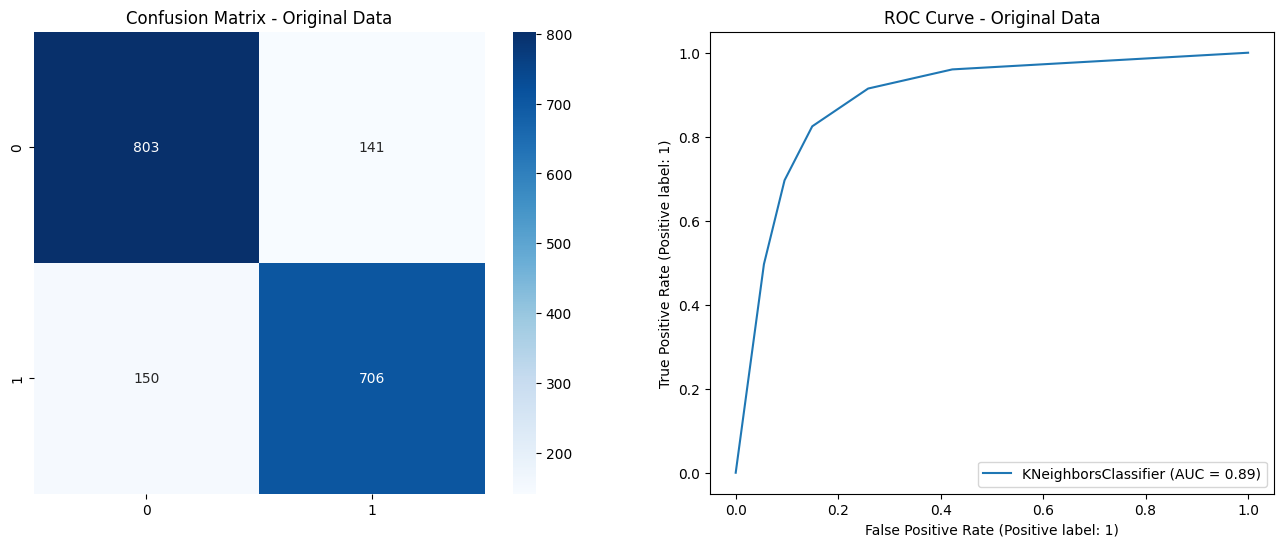

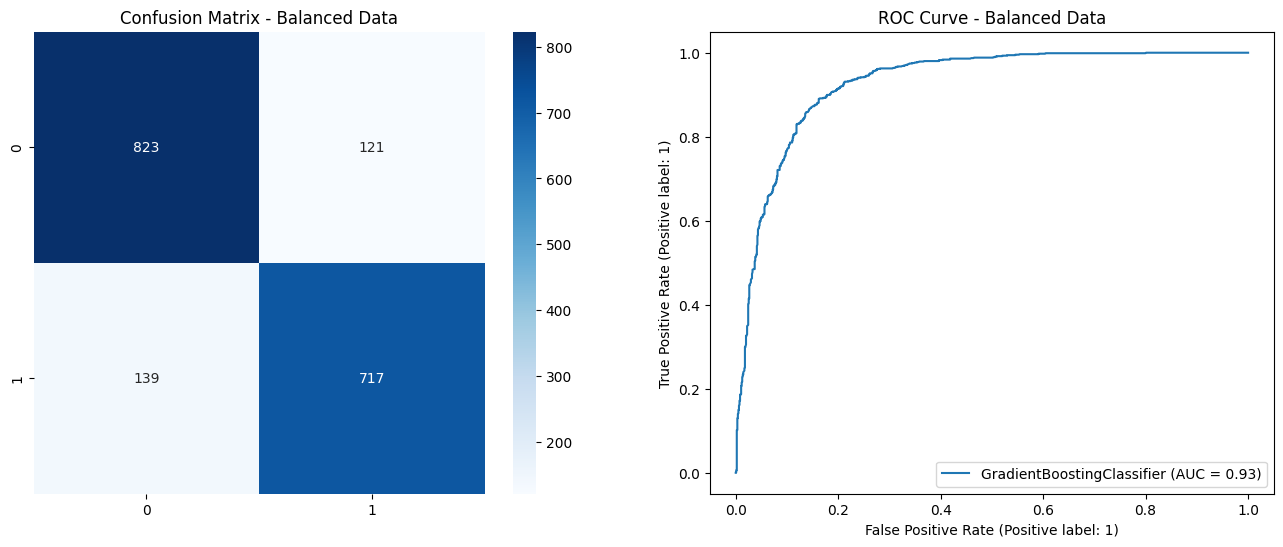

In [92]:


def plot_confusion_roc(model, X, y, case_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Confusion Matrix
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {case_name}')
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X, y, ax=ax2)
    ax2.set_title(f'ROC Curve - {case_name}')
    plt.show()

# Первый случай (например, до балансировки)
plot_confusion_roc(knn, X_test, y_test, 'Original Data')


smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
knn_balanced = GradientBoostingClassifier().fit(X_res, y_res)
plot_confusion_roc(knn_balanced, X_test, y_test, 'Balanced Data')



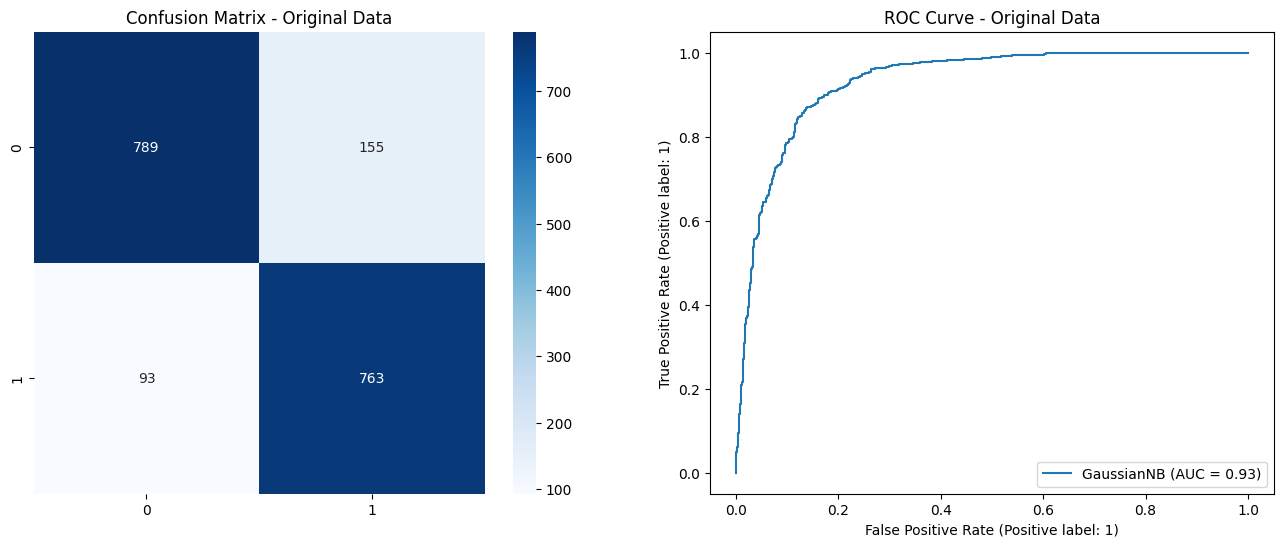

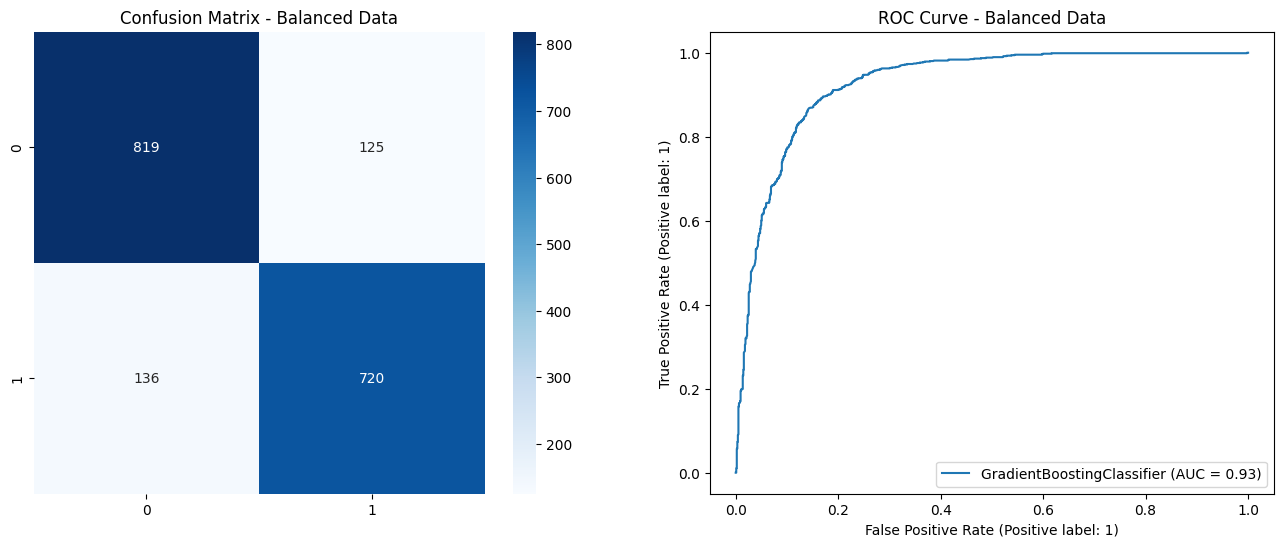

In [93]:


def plot_confusion_roc(model, X, y, case_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Confusion Matrix
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {case_name}')
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X, y, ax=ax2)
    ax2.set_title(f'ROC Curve - {case_name}')
    plt.show()

# Первый случай (например, до балансировки)
plot_confusion_roc(g, X_test, y_test, 'Original Data')


smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
g_balanced = GradientBoostingClassifier().fit(X_res, y_res)
plot_confusion_roc(g_balanced, X_test, y_test, 'Balanced Data')



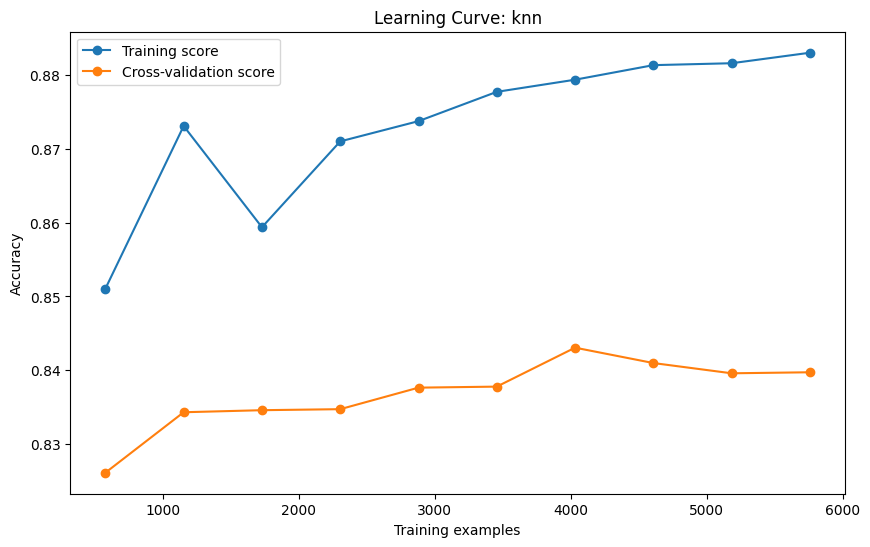

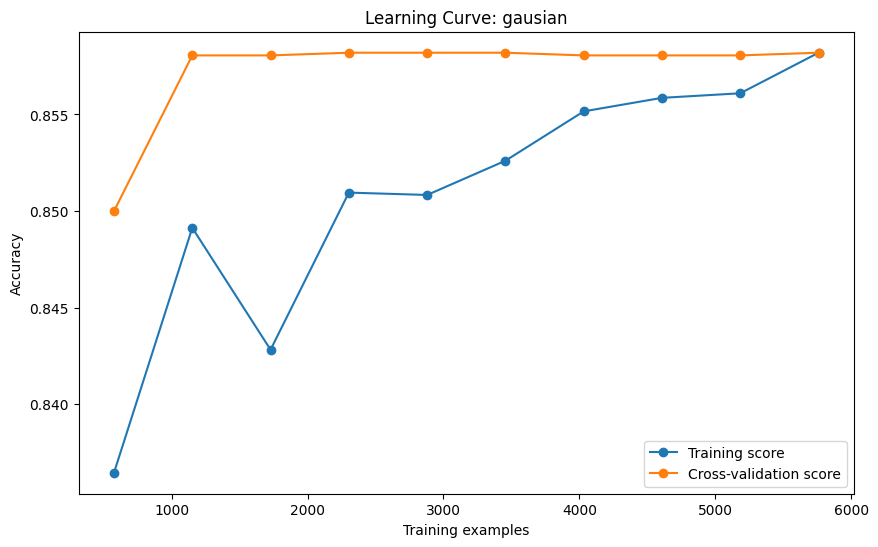

In [94]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve: {model_name}')
    plt.legend()
    plt.show()

plot_learning_curve(knn, X_train, y_train, 'knn')
plot_learning_curve(g, X_train, y_train, 'gausian') 

#### mlp & extratrees

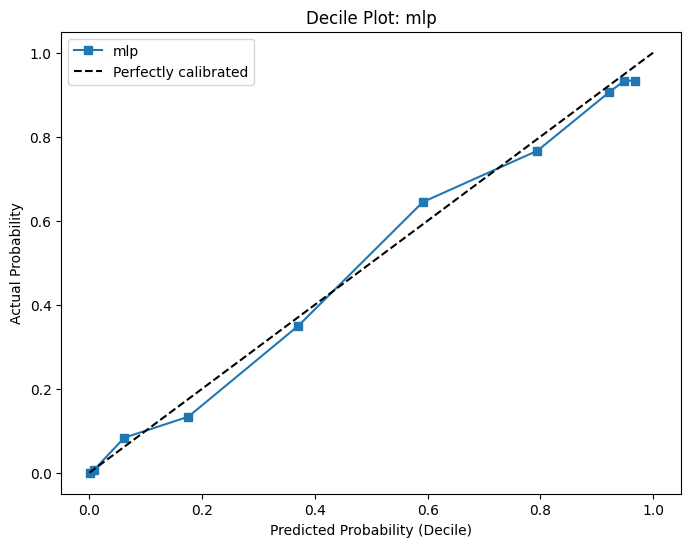

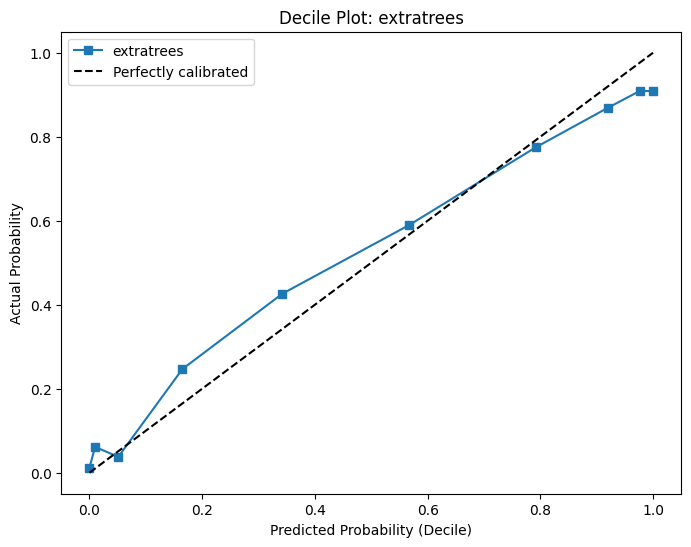

In [95]:


def plot_decile_curve(y_true, y_proba, model_name):
    prob_true, prob_pred = calibration_curve(y_true, y_proba, n_bins=10, strategy='quantile')
    
    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, 's-', label=model_name)
    plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
    plt.xlabel('Predicted Probability (Decile)')
    plt.ylabel('Actual Probability')
    plt.title(f'Decile Plot: {model_name}')
    plt.legend()
    plt.show()





mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300).fit(X_train, y_train)
plot_decile_curve(y_test, mlp.predict_proba(X_test)[:,1], 'mlp')


et = ExtraTreesClassifier().fit(X_train, y_train)
plot_decile_curve(y_test, et.predict_proba(X_test)[:,1], 'extratrees')


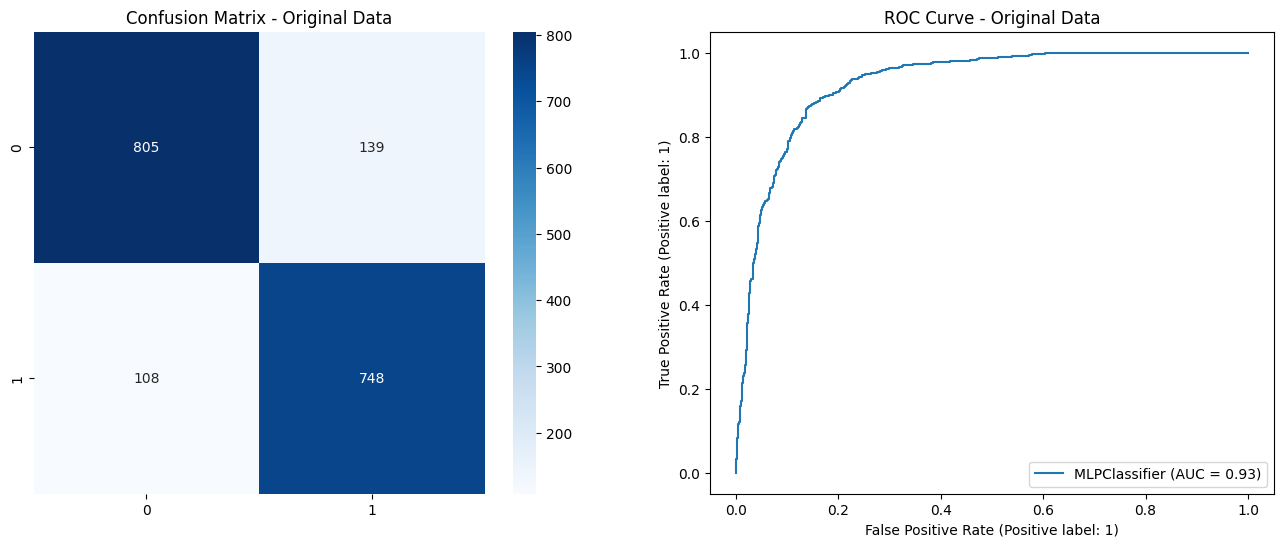

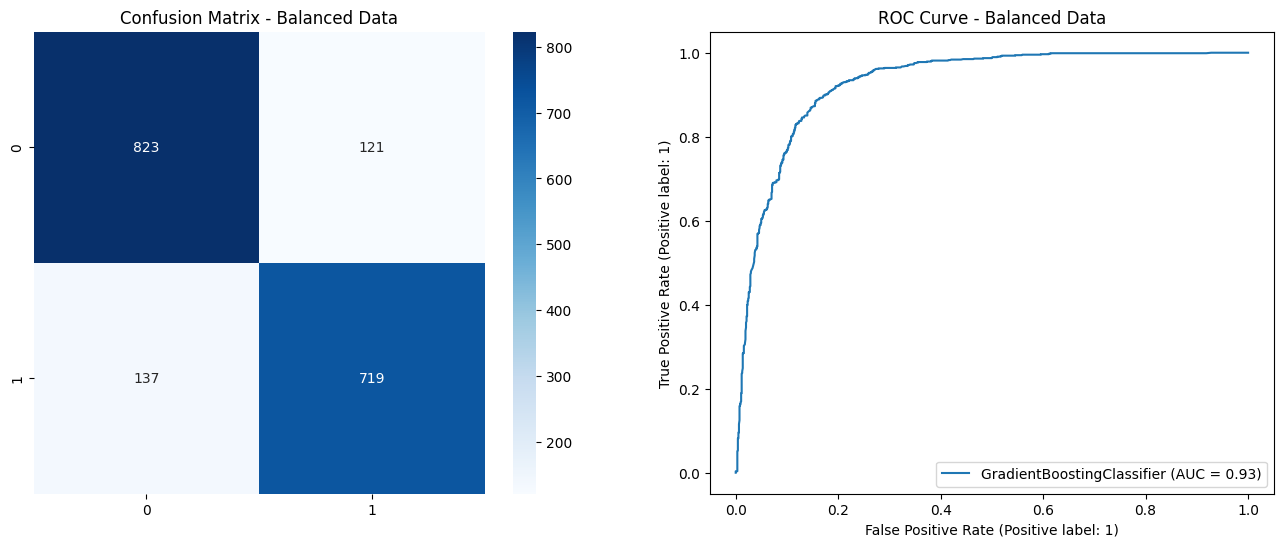

In [96]:

def plot_confusion_roc(model, X, y, case_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Confusion Matrix
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {case_name}')
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X, y, ax=ax2)
    ax2.set_title(f'ROC Curve - {case_name}')
    plt.show()

# Первый случай (например, до балансировки)
plot_confusion_roc(mlp, X_test, y_test, 'Original Data')

# Второй случай (после балансировки)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
mlp_balanced = GradientBoostingClassifier().fit(X_res, y_res)
plot_confusion_roc(mlp_balanced, X_test, y_test, 'Balanced Data')



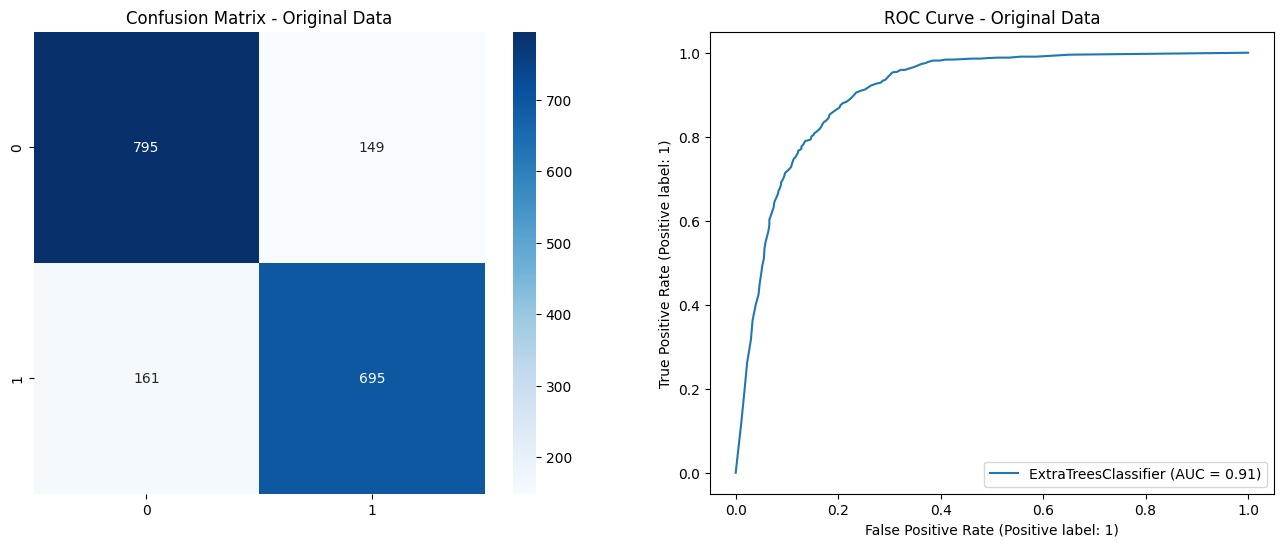

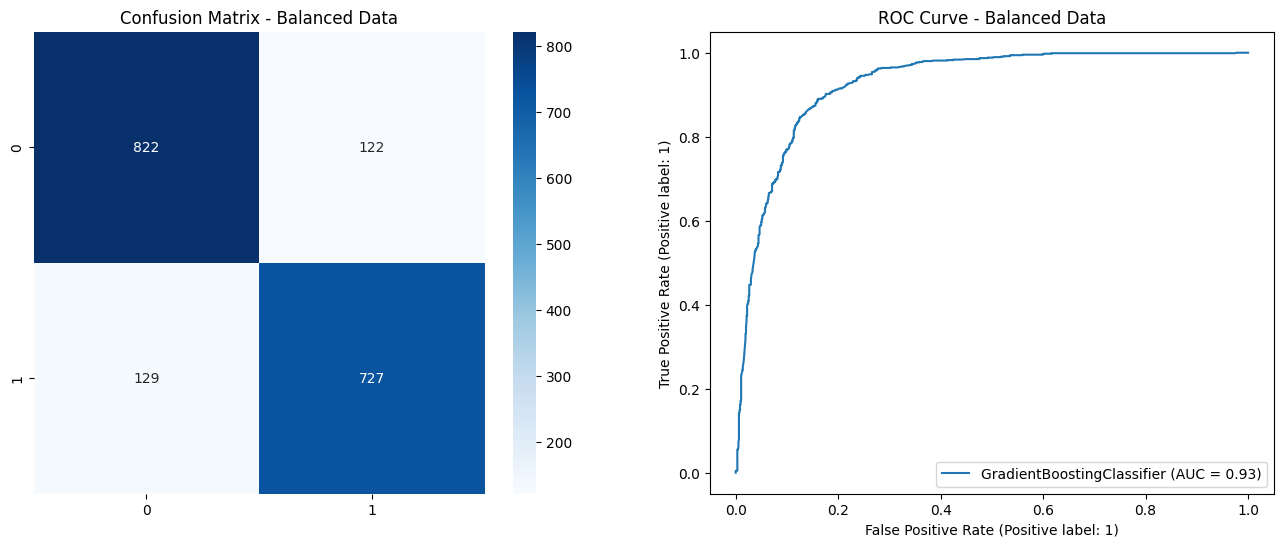

In [97]:


def plot_confusion_roc(model, X, y, case_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Confusion Matrix
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {case_name}')
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X, y, ax=ax2)
    ax2.set_title(f'ROC Curve - {case_name}')
    plt.show()

# Первый случай (например, до балансировки)
plot_confusion_roc(et, X_test, y_test, 'Original Data')

# Второй случай (после балансировки)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
et_balanced = GradientBoostingClassifier().fit(X_res, y_res)
plot_confusion_roc(et_balanced, X_test, y_test, 'Balanced Data')



/Users/ka53/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ka53/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ka53/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ka53/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ka53/Library/

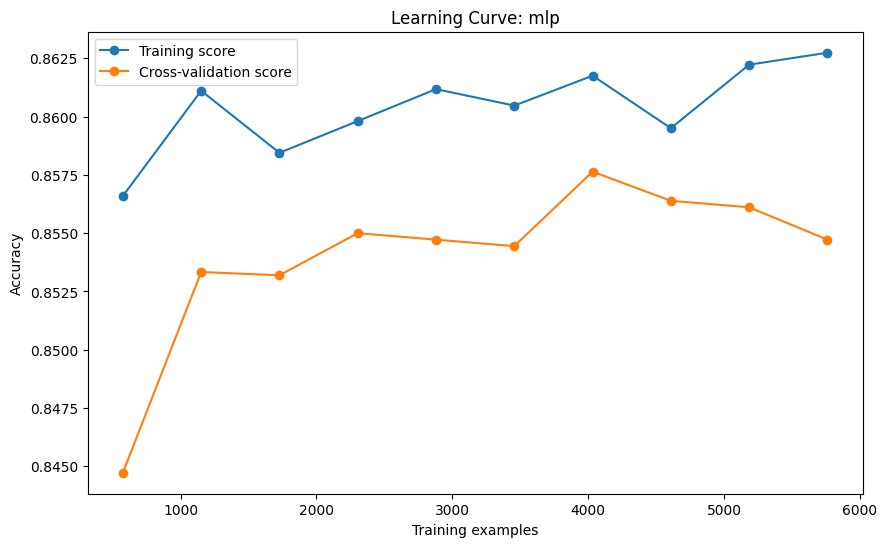

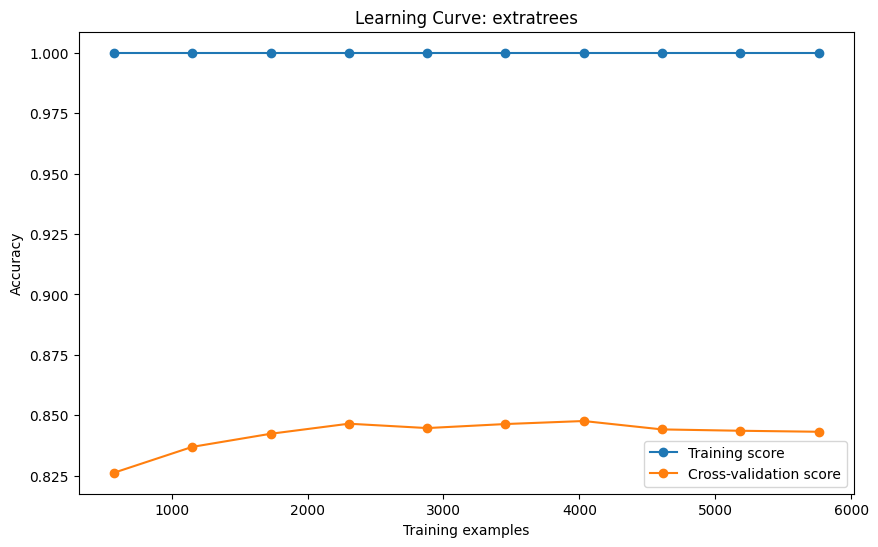

In [98]:


def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve: {model_name}')
    plt.legend()
    plt.show()

plot_learning_curve(mlp, X_train, y_train, 'mlp')
plot_learning_curve(et, X_train, y_train, 'extratrees') 